# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def get (data, mean, cov, a) :
  # find (data- mean).T * cov -1 * (data - mean)
  inv_cov = np.linalg.inv(cov) 
  a = a / np.sqrt(np.linalg.det(cov)) 
  result = np.dot((data - mean).T, inv_cov)   
  result = np.dot(result, data - mean)  
  result = np.exp(-(result)/2)
  result = result * a
  #print(result)
  return result

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos_rowindex = [] 
    neg_rowindex = []
    for i in range(0, Y_train.shape[0]) : 
      if Y_train[i] == 1 : 
        pos_rowindex.append(i)
      else :
        neg_rowindex.append(i)
    # probability of Y=1 is a
    a = len(pos_rowindex) / Y_train.shape[0]
    pos_mean = np.mean(X_train[pos_rowindex], axis = 0).reshape(-1,1) # or use transpose
    neg_mean = np.mean(X_train[neg_rowindex], axis = 0).reshape(-1,1)    
    c = (np.dot(pos_mean.T, pos_mean) - np.dot(neg_mean.T, neg_mean))/2
    d = np.dot( X_test, np.subtract(neg_mean, pos_mean))
    d = np.add(d, c)
    e = ((1-a)/a) * np.exp(d)
    eta = 1 / (1 + e)
    eta[eta > 0.5] = 1
    eta[eta < 0.5] = -1

    return np.squeeze(eta)


    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos_rowindex = [] 
    neg_rowindex = []
    for i in range(0, Y_train.shape[0]) : 
      if Y_train[i] == 1 : 
        pos_rowindex.append(i)
      else :
        neg_rowindex.append(i)
    # probability of Y=1 is a
    a = len(pos_rowindex) / Y_train.shape[0]
    pos_mean = np.mean(X_train[pos_rowindex], axis = 0).reshape(-1,1) # or use transpose
    neg_mean = np.mean(X_train[neg_rowindex], axis = 0).reshape(-1,1) 
    
    # covariance
    diff_pos = X_train[pos_rowindex] - pos_mean.T
    diff_pos = np.dot(diff_pos.T, diff_pos)
    diff_neg = X_train[neg_rowindex] - neg_mean.T
    diff_neg = np.dot(diff_neg.T, diff_neg)
    cov = (diff_pos + diff_neg)/ X_train.shape[0]
    p = []
    q = []
       
    for i in range(0,X_test.shape[0]):
       p.append(get(np.array(X_test[i]).reshape(-1,1), pos_mean, cov, a))
       q.append(get(np.array(X_test[i]).reshape(-1,1), neg_mean, cov, 1-a))

    p = np.array(p).reshape(-1,1)

    q = np.array(q).reshape(-1,1)
    eta = p / (p + q)
    eta[eta > .5] = 1
    eta[eta <= .5] = -1

    return np.squeeze(eta)



def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    pos_rowindex = [] 
    neg_rowindex = []
    for i in range(0, Y_train.shape[0]) : 
      if Y_train[i] == 1 : 
        pos_rowindex.append(i)
      else :
        neg_rowindex.append(i)
    # probability of Y=1 is a
    a = len(pos_rowindex) / Y_train.shape[0]
    pos_mean = np.mean(X_train[pos_rowindex], axis = 0).reshape(-1,1) # or use transpose
    neg_mean = np.mean(X_train[neg_rowindex], axis = 0).reshape(-1,1) 

    # covariance
    diff_pos = X_train[pos_rowindex] - pos_mean.T
    #print(diff_pos)
    diff_pos = np.dot(diff_pos.T, diff_pos)
    #print(diff_pos)
    cov_pos = diff_pos / len(pos_rowindex)
    #print(cov_pos)
    diff_neg = X_train[neg_rowindex] - neg_mean.T
    diff_neg = np.dot(diff_neg.T, diff_neg)
    cov_neg = diff_neg / len(neg_rowindex)
 
    p = []
    q = []
    
    for i in range (0,X_test.shape[0]) :
       p.append(get(np.array(X_test[i]).reshape(-1,1), pos_mean, cov_pos, a))
       q.append(get(np.array(X_test[i]).reshape(-1,1), neg_mean, cov_neg, 1-a))

    p = np.array(p).reshape(-1,1)
    q = np.array(q).reshape(-1,1)
    eta = p / (p + q)
    eta[eta > 0.5] = 1
    eta[eta <= 0.5] = -1

    return np.squeeze(eta)

    


In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


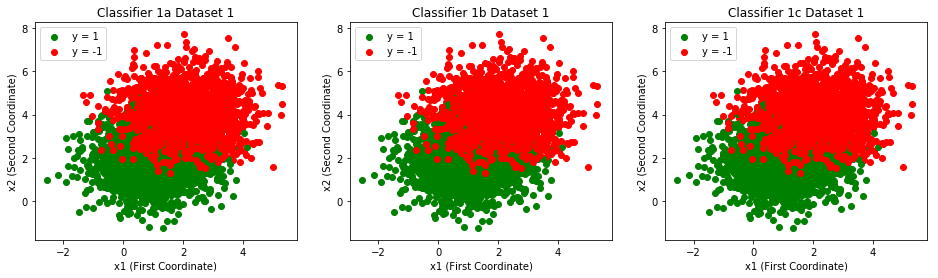

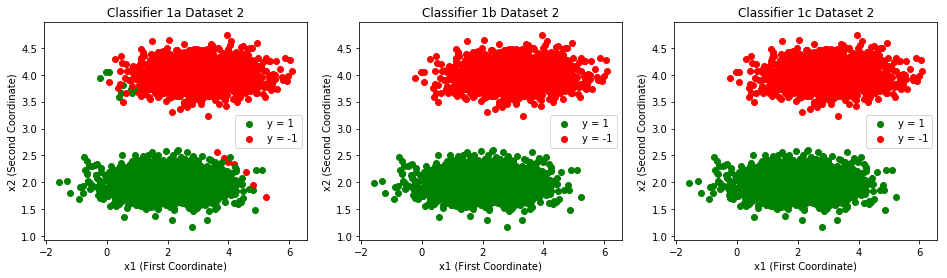

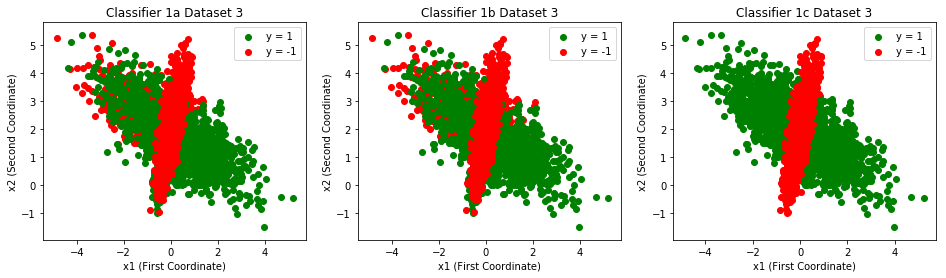

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
 #get X_train, Y_train, X_test, Y_test

def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l

def get_error_rate(pred, actual) :
    a = [pred == 1]
    b = [actual[a] == -1]
    error = np.sum(b)
    
    a = [pred == -1]
    b = [actual[a] == 1]
    error += np.sum(b)
    error = error / pred.shape[0]
    return error

dataset = ['dataset1_1.npz', 'dataset1_2.npz', 'dataset1_3.npz']
error_table = []
for i in range(0,3) :
    l = get_data(dataset[i])
    X_train = l[0]
    Y_train = l[1]
    X_test = l[2]
    Y_test = l[3]
    pred_list = []
    pred_list.append(Bayes1a(X_train, Y_train, X_test))
    pred_list.append(Bayes1b(X_train, Y_train, X_test))
    pred_list.append(Bayes1c(X_train, Y_train, X_test))
    fig = plt.figure(figsize = (16,4))
    # Bayes1a 
    error1 = []
    for k in pred_list:
        error1.append(get_error_rate(k.reshape(-1,1), Y_test.reshape(-1,1)))
    error_table.append(error1)
        
    for j in range(0,3): 
        plt1 = fig.add_subplot(1,3, j+1)
        pos_index_train = X_train[Y_train == 1]
        neg_index_train = X_train[Y_train == -1]
        pos_index_test = X_test[pred_list[j] == 1]
        neg_index_test = X_test[pred_list[j] == -1]
        plt1.set(xlabel = "x1 (First Coordinate)", ylabel = "x2 (Second Coordinate)")
        s = 'Classifier 1'  + chr(ord('a') + j) + ' Dataset ' + str(i+1)
        plt1.set_title(s)
        plt1.scatter(pos_index_test[:, 0], pos_index_test[:, 1], color = 'g')
        plt1.scatter(neg_index_test[:,0], neg_index_test[:, 1], color = 'r')
        plt1.scatter(pos_index_train[:, 0], pos_index_train[:, 1], label = "y = 1", color = 'g')
        plt1.scatter(neg_index_train[:,0], neg_index_train[:, 1], label = "y = -1", color = 'r')
        plt1.legend()
        
    plt.show()


#plt.axis('off')
#plt.axis('tight')   
#row_names = ['Dataset1', 'Dataset2', 'Dataset3']
#col_names = ['Classifier1', 'Classifier2', 'Classifier3']
#plt.title('Error table')
#tab = plt.table(cellText = error_table,rowLabels = row_names,colLabels = col_names, loc = 'center')
#tab.scale(3,4)
#tab.auto_set_font_size(True)
#plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

                                                ERROR TABLE

|           | Classifier 1a | Classifier 1b | Classifier 1c |
|-----------|---------------|---------------|---------------|
| Dataset 1 | 0.126         | 0.1245        | 0.1245        |
| Dataset 2 | 0.0085        | 0.0           | 0.0           |
| Dataset 3 | 0.497         | 0.495         | 0.135         |


Observations: 

    Classifier 1a - Assumes same known variance, 
    Classifier 1b - Assumes same unknown variance, 
    Classifier 1c - different unknown variance

1.We can see from error table that as we reduce the restrictions on classifier, the error rate decreases.

2.Error across Classifiers : Classifier 1a < Classifier 1b < Classifier 1c

3.Errors across datasets :  Dataset2 < Dataset1 < Dataset3

4.Dataset2 is more seperable than Dataset1. Dataset1 is more seperable than Dataset3.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell

def get_prob (data, mean, cov, a) :
  # find (data- mean).T * cov -1 * (data - mean)
  inv_cov = np.linalg.inv(cov) 
  a = a / np.sqrt(np.linalg.det(cov)) 
  result = np.dot((data - mean).T, inv_cov)   
  result = np.dot(result, data - mean)  
  result = np.exp(-(result)/2)
  result = result * a
  #print(result)
  return result

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    rowindex = [] 
    for i in range(1, 5) : 
      rowindex.append(Y_train == i)
    
    rowindex = np.array(rowindex).reshape(4,-1)
    mean = []  #mean list
    for i in rowindex :
      mean.append(np.mean(X_train[i], axis = 0))
    mean = np.array(mean).reshape(4,-1)  # or squeeze
   
    a = []    #probability list
    for i in range(0,4):
       a.append(np.sum(rowindex[i])/X_train.shape[0]) 

    # covariance matrix Id
    cov = np.eye(X_train.shape[1])  
    pred_list = []
    for i in range(0,X_test.shape[0]) :
      p = []
      for j in range(0,4) :  
        p.append(get_prob(np.array(X_test[i].reshape(-1,1)), mean[j].reshape(-1,1), cov,a[j]))
      p = np.array(p).reshape(1,-1)
      pred_list.append(np.argmin(np.dot(p, L), axis = 1)+1)

    pred = np.array(pred_list).reshape(-1,1)

    return np.squeeze(pred) 

    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    rowindex = [] 
    for i in range(1, 5) : 
      rowindex.append(Y_train == i)
    
    rowindex = np.array(rowindex).reshape(4,-1)
    mean = []  #mean list
    for i in rowindex :
      mean.append(np.mean(X_train[i], axis = 0))
    mean = np.array(mean).reshape(4,-1)  # or squeeze
   
    a = []    #probability list
    for i in range(0,4):
       a.append(np.sum(rowindex[i])/X_train.shape[0]) 

    # covariance matrix Id
    cov = np.zeros([X_train.shape[1], X_train.shape[1]])
    for i in range(0,4) :
      q = X_train[rowindex[i]]
      q = q.T - (mean[i].reshape(-1,1))
      ans = np.dot(q, q.T)
      cov = cov + ans

    cov = cov / X_train.shape[0]  
    pred_list = []
    for i in range(0,X_test.shape[0]) :
      p = []
      for j in range(0,4) :  
        p.append(get_prob(np.array(X_test[i].reshape(-1,1)), mean[j].reshape(-1,1), cov,a[j]))
      p = np.array(p).reshape(1,-1)
      pred_list.append(np.argmin(np.dot(p, L), axis = 1)+1)

    pred = np.array(pred_list).reshape(-1,1)

    return np.squeeze(pred) 


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """

    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    rowindex = [] 
    for i in range(1, 5) : 
      rowindex.append(Y_train == i)
    
    rowindex = np.array(rowindex).reshape(4,-1)
    mean = []  #mean list
    for i in rowindex :
      mean.append(np.mean(X_train[i], axis = 0))
    mean = np.array(mean).reshape(4,-1)  # or squeeze
   
    a = []    #probability list
    for i in range(0,4):
       a.append(np.sum(rowindex[i])/X_train.shape[0]) 

    # covariance matrix Id
    cov = []
    for i in range(0,4) :
      q = X_train[rowindex[i]]
      q = q.T - (mean[i].reshape(-1,1))
      ans =  np.dot(q, q.T)
      ans = ans / sum(rowindex[i])
      cov.append(ans)
  
    pred_list = []
    for i in range(0,X_test.shape[0]) :
      p = []
      for j in range(0,4) :  
        p.append(get_prob(np.array(X_test[i].reshape(-1,1)), mean[j].reshape(-1,1), cov[j],a[j]))
      p = np.array(p).reshape(1,-1)
      pred_list.append(np.argmin(np.dot(p, L), axis = 1)+1)

    pred = np.array(pred_list).reshape(-1,1)
    return np.squeeze(pred) 


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


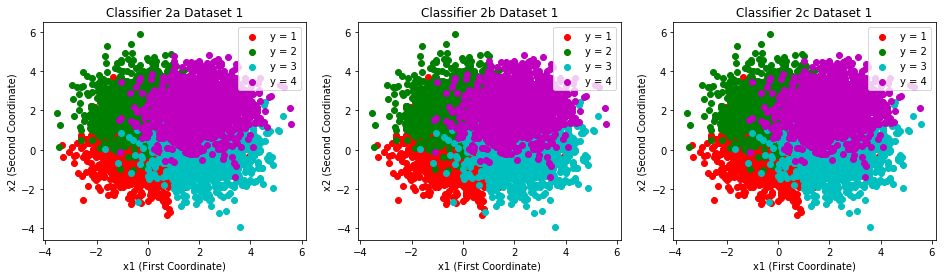

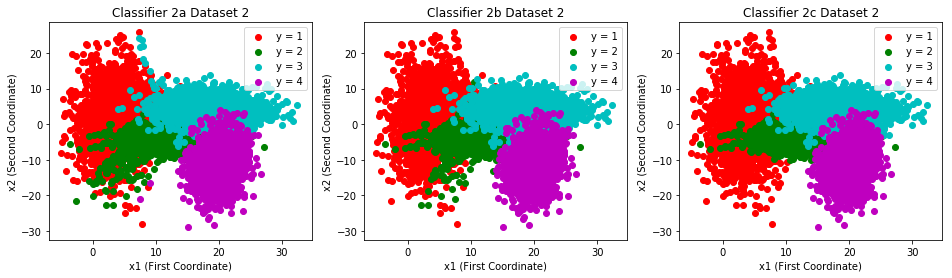

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
 #get X_train, Y_train, X_test, Y_test

def get_data (s) :    
    data = np.load(s)
    l = []
    for x in data:
        l.append(data[x])
    return l

def get_error_rate(pred, actual) :
    error = 0
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    for i in range(0, pred.shape[0]) :
        error = error + L[int(pred[i])-1][int(actual[i])-1]
        
    error = error / pred.shape[0]
    return error

def confusion_matrix(pred, actual) :
    conf_matrix = np.zeros([4, 4], dtype = int)
    for i in range(0, 4) :
        for j in range(0, 4) :
            b = [actual == i+1]
            a = [pred[b] == j+1]
            conf_matrix[i][j] = np.sum(a)
    return conf_matrix
            

dataset = ['dataset2_1.npz', 'dataset2_2.npz']
error_table = []
conf_matrix = []
for i in range(0,2) :
    l = get_data(dataset[i])
    X_train = l[0]
    Y_train = l[1]
    X_test = l[2]
    Y_test = l[3]
    pred_list = []
    pred_list.append(Bayes2a(X_train, Y_train, X_test))
    pred_list.append(Bayes2b(X_train, Y_train, X_test))
    pred_list.append(Bayes2c(X_train, Y_train, X_test))
    fig = plt.figure(figsize = (16,4))
    # Bayes1a 
    error1 = []
    b = 1
    for k in pred_list:
        error1.append(get_error_rate(k.reshape(-1,1), Y_test.reshape(-1,1)))
        conf_matrix.append(confusion_matrix(k.reshape(-1,1), Y_test.reshape(-1,1)))
        b = b+1
    error_table.append(error1)
        
    for j in range(0,3): 
        plt1 = fig.add_subplot(1,3, j+1)
        x_train = X_train[:, 0]
        y_train = X_train[:, 1]
        index_train = []
        for p in range(1,5) :
            index_train.append(X_train[Y_train == p])
            
        index_test = []
        for p in range(1,5) :
            index_test.append(X_test[pred_list[j] == p])

        s = 'Classifier 2'  + chr(ord('a') + j) + ' Dataset ' + str(i+1)
        colors = ['r','g','c','m']
        plt1.set_title(s)
        for p in range(1,5) :
            s = "y = " + str(p)
            plt1.set(xlabel = "x1 (First Coordinate)", ylabel = "x2 (Second Coordinate)")
            plt1.scatter(index_train[p-1][:, 0], index_train[p-1][:,1], label = s, color = colors[p-1])
            plt1.scatter(index_test[p-1][:,0], index_test[p-1][:,1], color = colors[p-1])
    
        plt1.legend()
        
    plt.show()


#row_names = ['Dataset1', 'Dataset2']
#col_names = ['Classifier2a', 'Classifier2b', 'Classifier2c']
#plt.axis('off')
#plt.axis('tight')   
#tab = plt.table(cellText = error_table,rowLabels = row_names,colLabels = col_names, loc = 'center')
#tab.scale(2,3)
#tab.auto_set_font_size(True)
#plt.title('Error table')
#plt.show() 
#print('Confusion Matrices : ')
#row_names = ['True Class 1', 'True Class 2','True Class 3', 'True Class 4']
#col_names = ['Predicted Class 1','Predicted Class 2','Predicted Class 3','Predicted Class 4']
#i = 5
#for j in range(0,4):
#    print(" "+str(conf_matrix[i][j][0])+'  '+str(conf_matrix[i][j][1])+'  '+str(conf_matrix[i][j][2])+'  '+str(conf_matrix[i][j][3]))
#for i in range(0,2) :
#    for j in range(0,3):
#        s = 'Classifier '  + chr(ord('a') + j) + ' Dataset ' + str(i+1)
#        plt.axis('off')
#        plt.axis('tight')   
#        tab = plt.table(cellText = conf_matrix[((i*3) + j)],rowLabels = row_names,colLabels = col_names, loc = 'center')
#        tab.scale(2,2)
#        tab.auto_set_font_size(True)
#        plt.title(s)
#        plt.show()
        

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

                                               ERROR TABLE
|           | Classifier 2a | Classifier 2b | Classifier 2c |
|-----------|---------------|---------------|---------------|
| Dataset 1 | 0.42975       | 0.429         | 0.42775       |
| Dataset 2 | 0.1835        | 0.1895        | 0.14075       |

Observations: 

Classifier 2a - Assumes same known variance, 
Classifier 2b - Assumes same unknown variance, 
Classifier 2c - different unknown variance

1.Errors across datasets : Dataset2 < Dataset1
 
2.Dataset1 : Has almost same errors for 3 classifier . So probably the covariance matrix(and hence distribution pattern) is same and almost identity matrix.
  Dataset2 : Classifier 2c has less error than Classifier 2a & 2b. Hence the covarince matrix(and hence distribution pattern) is different for each X|Y=a.

              
3.We can see from error table that as we reduce the restrictions on classifier, the error rate decreases.

4.Predicting class 4 when true class is 1 or viceversa causes more loss, hence in confusion matrix we can see that their number is less. 


                                    CONFUSION MATRIX FOR CLASSIFIER 2a, DATASET 1
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class = 1 | 633                 | 219                 | 136                 | 12                  |
| True Class = 2 | 97                  | 738                 | 62                  | 103                 |
| True Class = 3 | 86                  | 49                  | 770                 | 95                  |
| True Class = 4 | 15                  | 136                 | 194                 | 655                 |


                                    CONFUSION MATRIX FOR CLASSIFIER 2b, DATASET 1
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class = 1 | 633                 | 218                 | 137                 | 12                  |
| True Class = 2 | 95                  | 743                 | 60                  | 102                 |
| True Class = 3 | 84                  | 49                  | 773                 | 94                  |
| True Class = 4 | 16                  | 137                 | 196                 | 651                 |

                                    CONFUSION MATRIX FOR CLASSIFIER 2c, DATASET 1
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class = 1 | 634                 | 217                 | 138                 | 11                  |
| True Class = 2 | 99                  | 742                 | 61                  | 98                  |
| True Class = 3 | 87                  | 47                  | 772                 | 94                  |
| True Class = 4 | 15                  | 134                 | 201                 | 650                 |
                                                
                                    CONFUSION MATRIX FOR CLASSIFIER 2a, DATASET 2
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class = 1 | 830                 | 150                 | 18                  | 2                   |
| True Class = 2 | 93                  | 784                 | 46                  | 77                  |
| True Class = 3 | 30                  | 61                  | 905                 | 4                   |
| True Class = 4 | 0                   | 23                  | 78                  | 899                 |
    
    
                                   CONFUSION MATRIX FOR CLASSIFIER 2b, DATASET 2
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class = 1 | 891                 | 106                 | 3                   | 0                   |
| True Class = 2 | 119                 | 691                 | 124                 | 66                  |
| True Class = 3 | 23                  | 106                 | 864                 | 7                   |
| True Class = 4 | 0                   | 5                   | 102                 | 893                 |


                                    CONFUSION MATRIX FOR CLASSIFIER 2c, DATASET 2
                                
|                | Predicted Class = 1 | Predicted Class = 2 | Predicted Class = 3 | Predicted Class = 4 |
|----------------|---------------------|---------------------|---------------------|---------------------|
| True Class = 1 | 901                 | 80                  | 19                  | 0                   |
| True Class = 2 | 64                  | 824                 | 46                  | 66                  |
| True Class = 3 | 19                  | 31                  | 936                 | 14                  |
| True Class = 4 | 0                   | 36                  | 48                  | 916                 |







**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




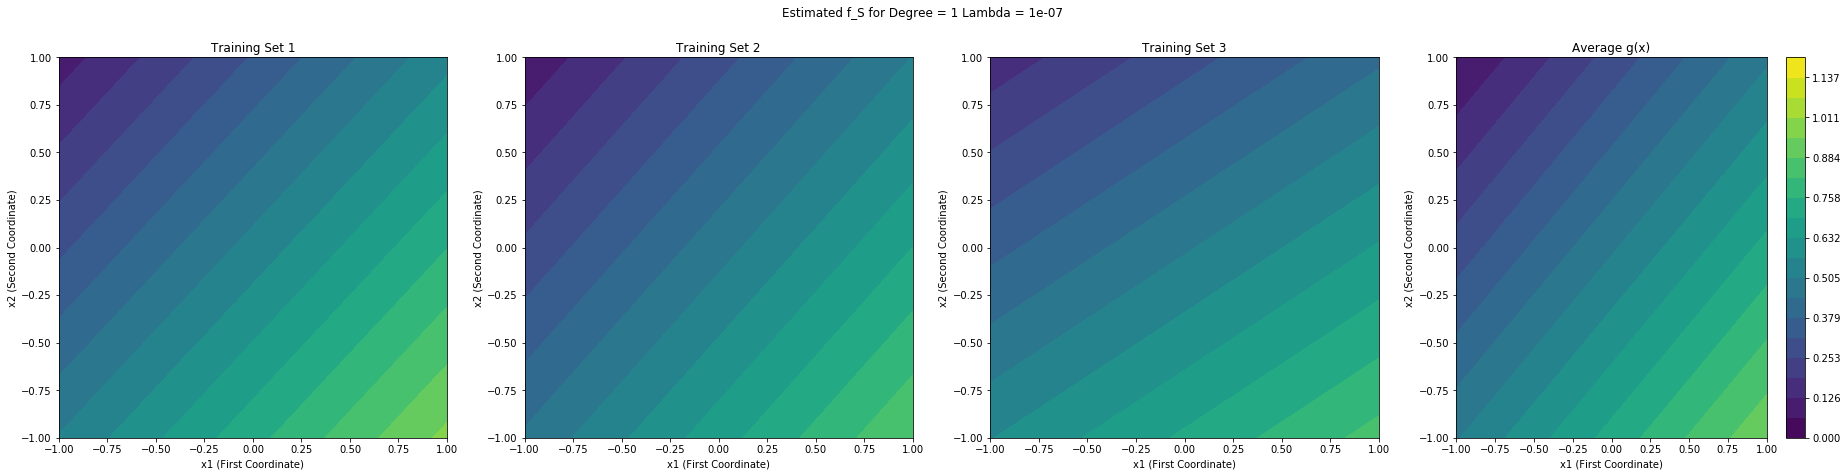

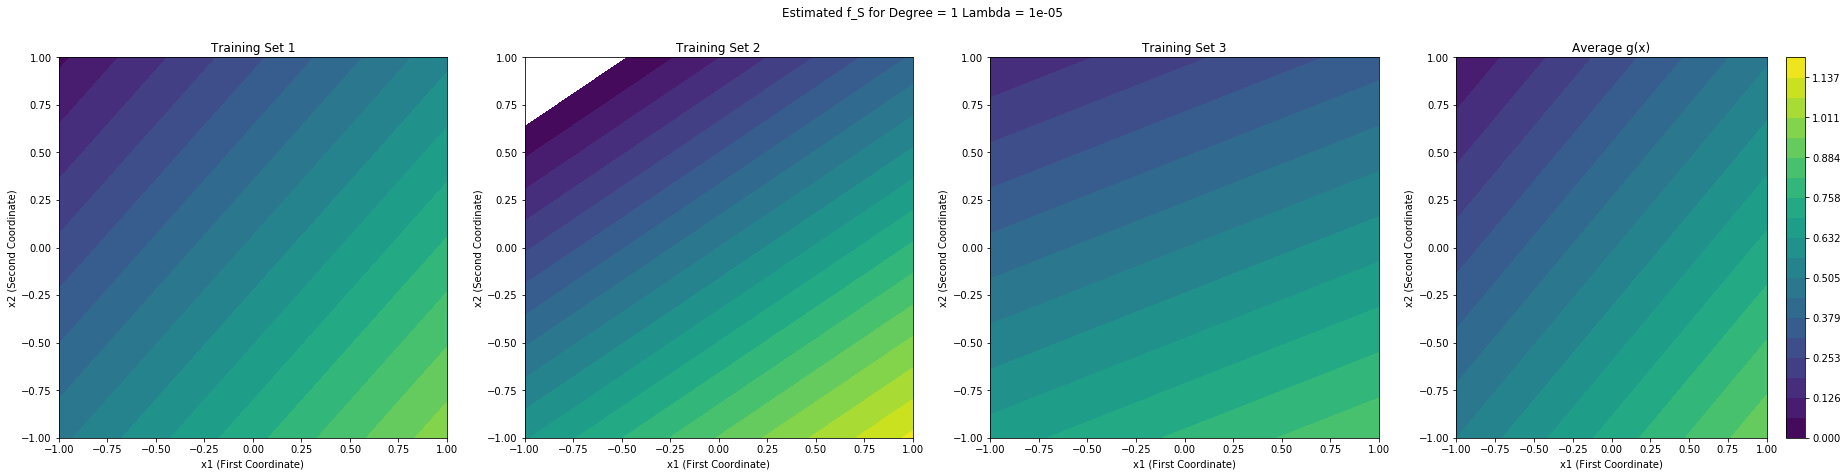

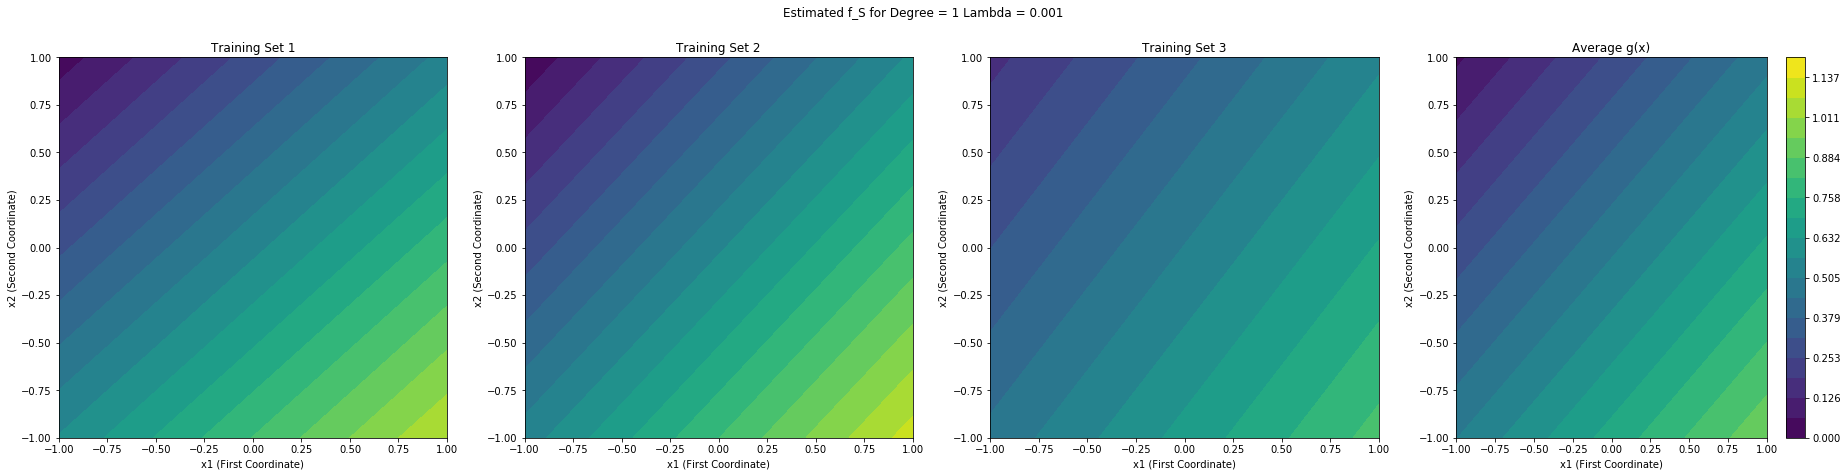

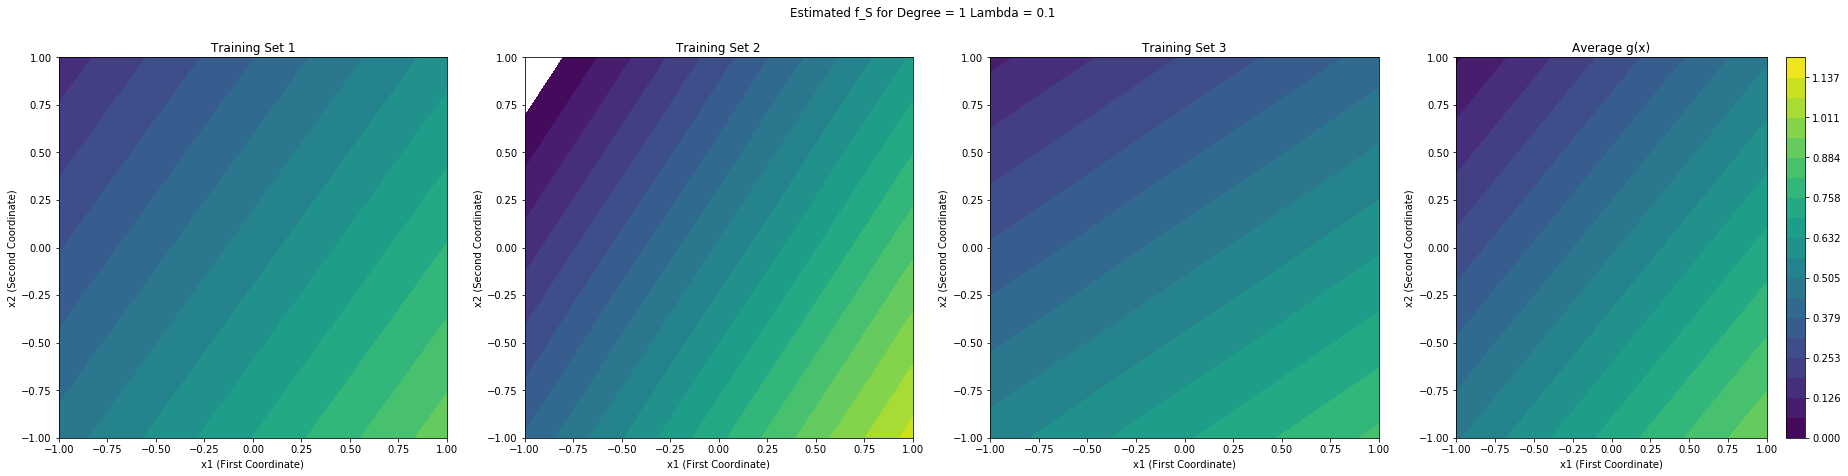

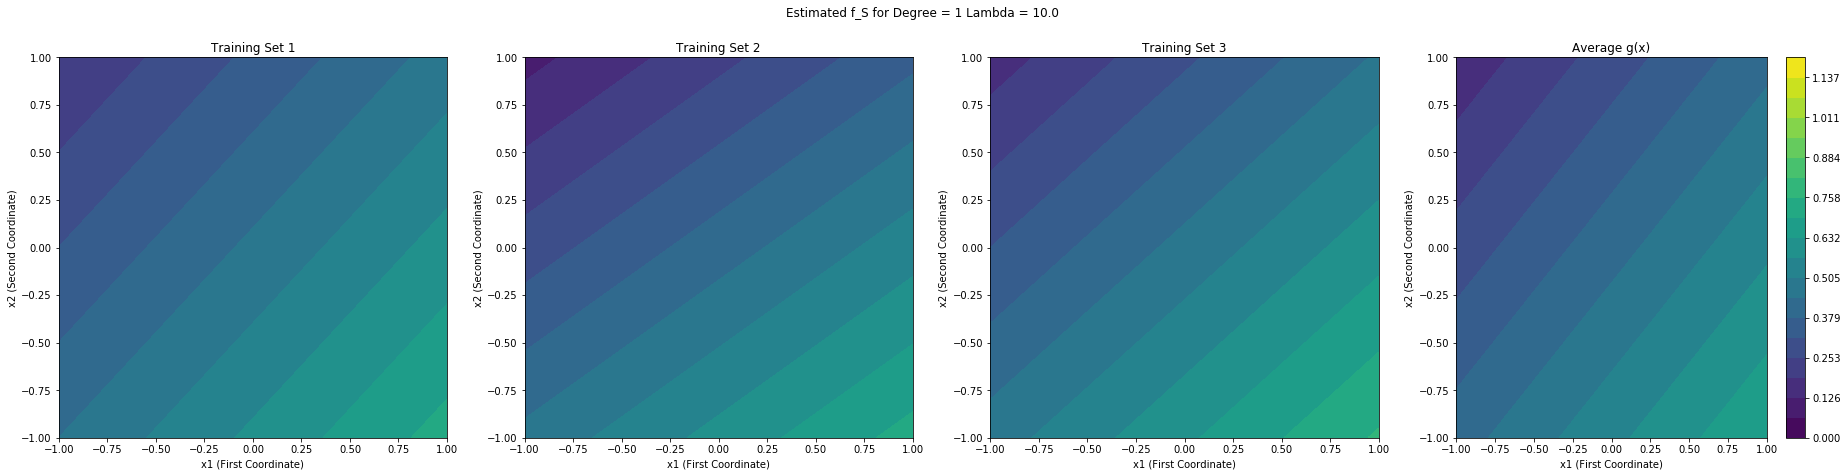

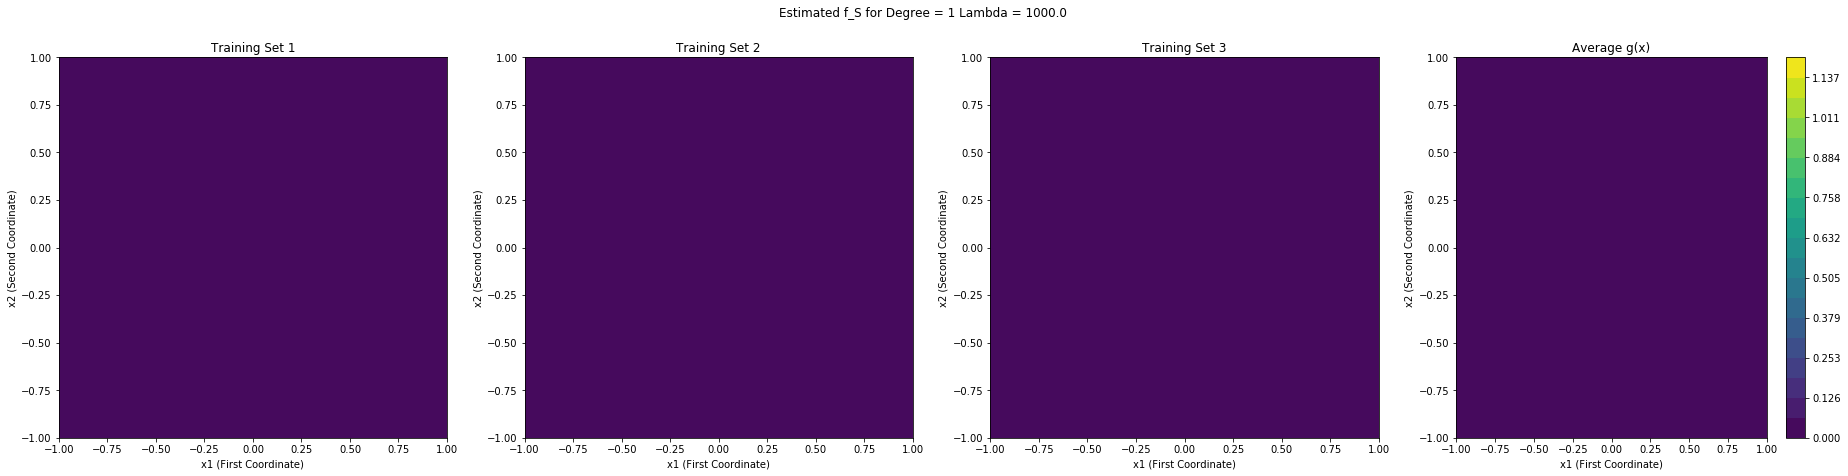

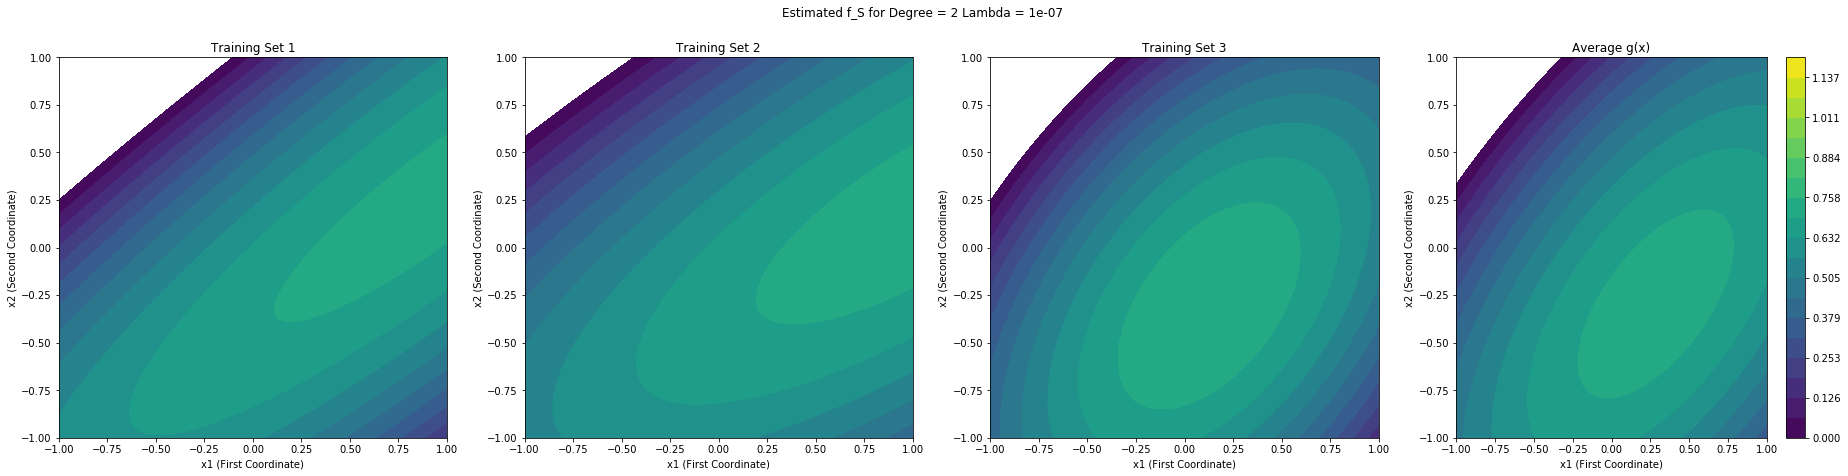

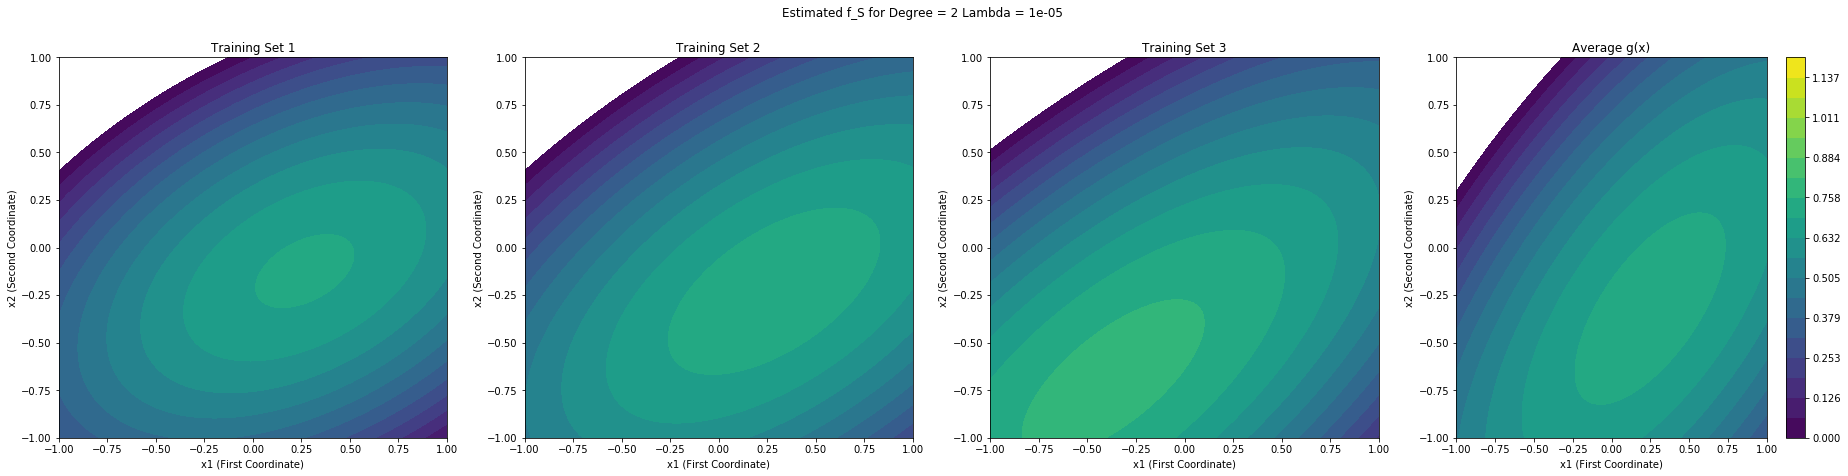

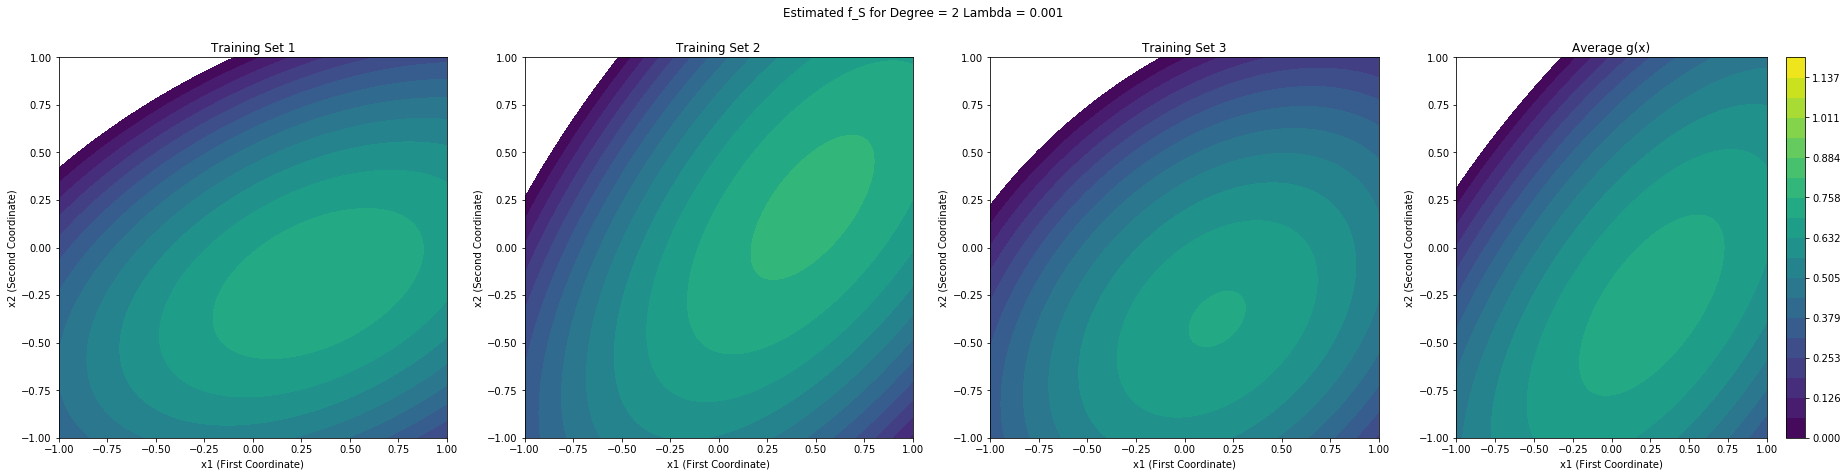

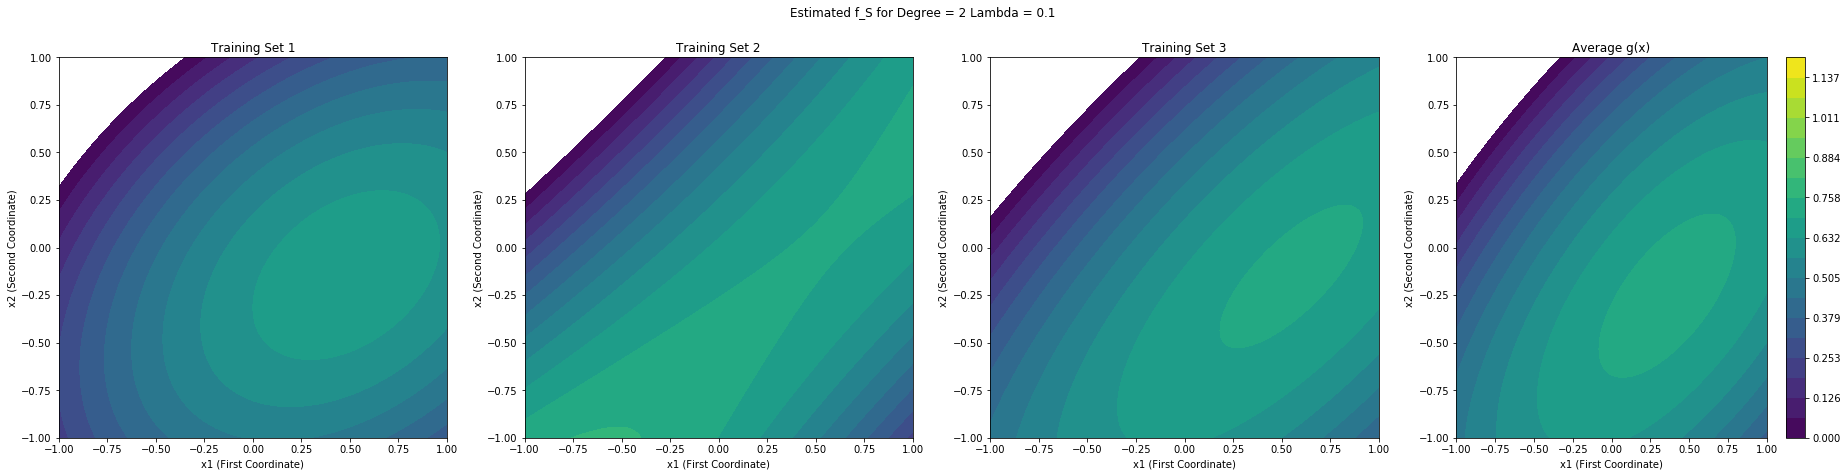

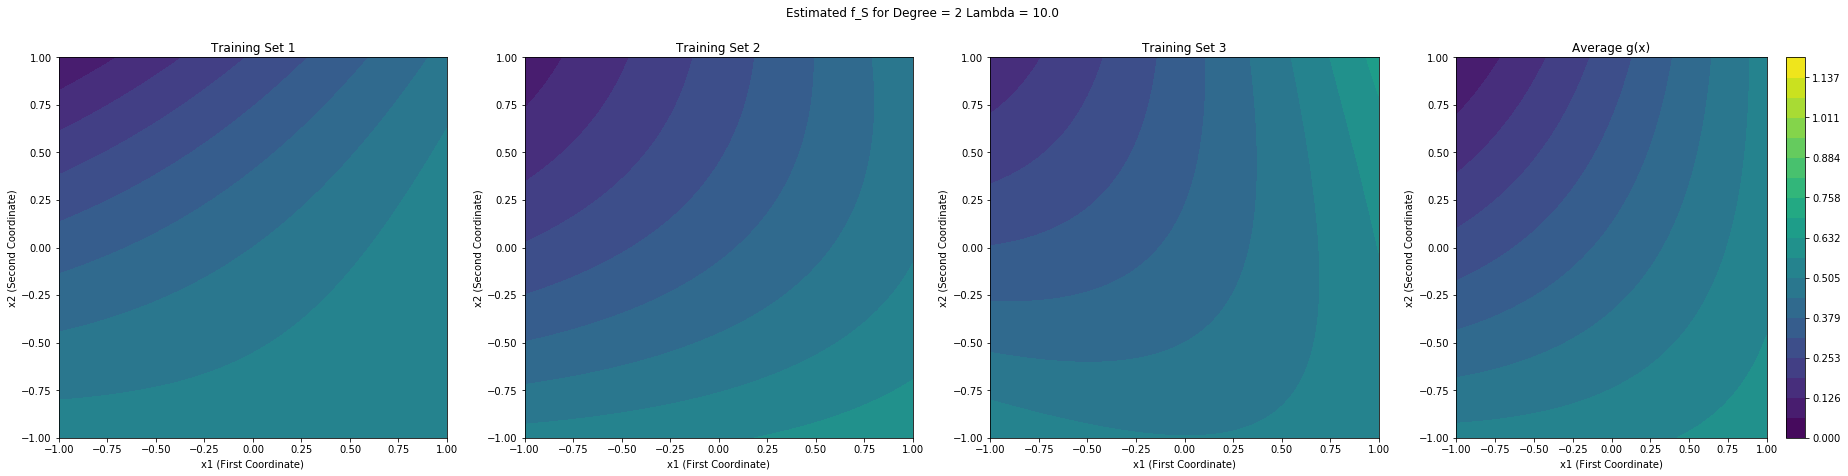

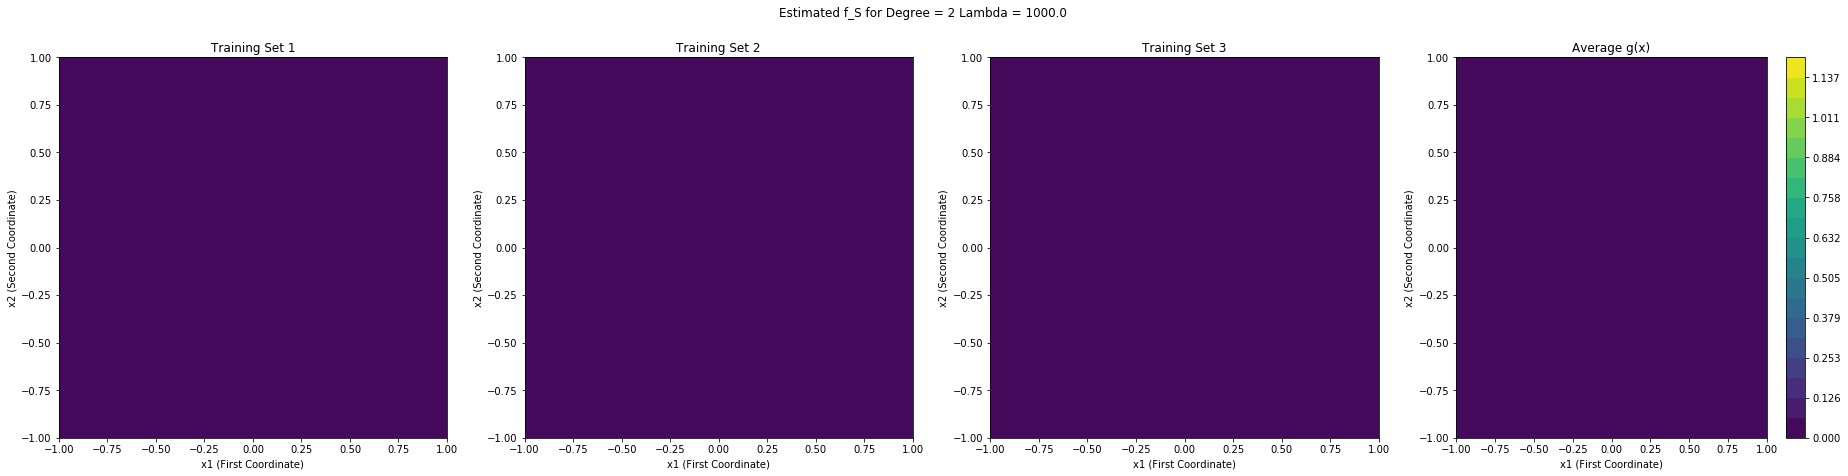

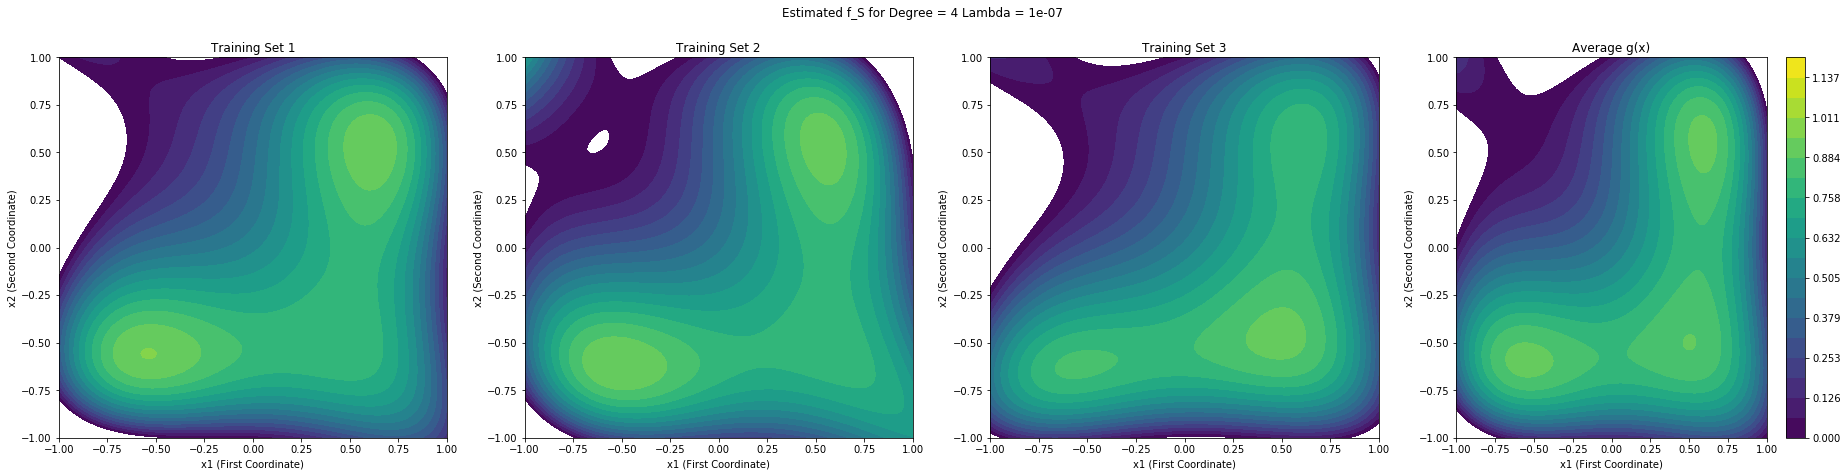

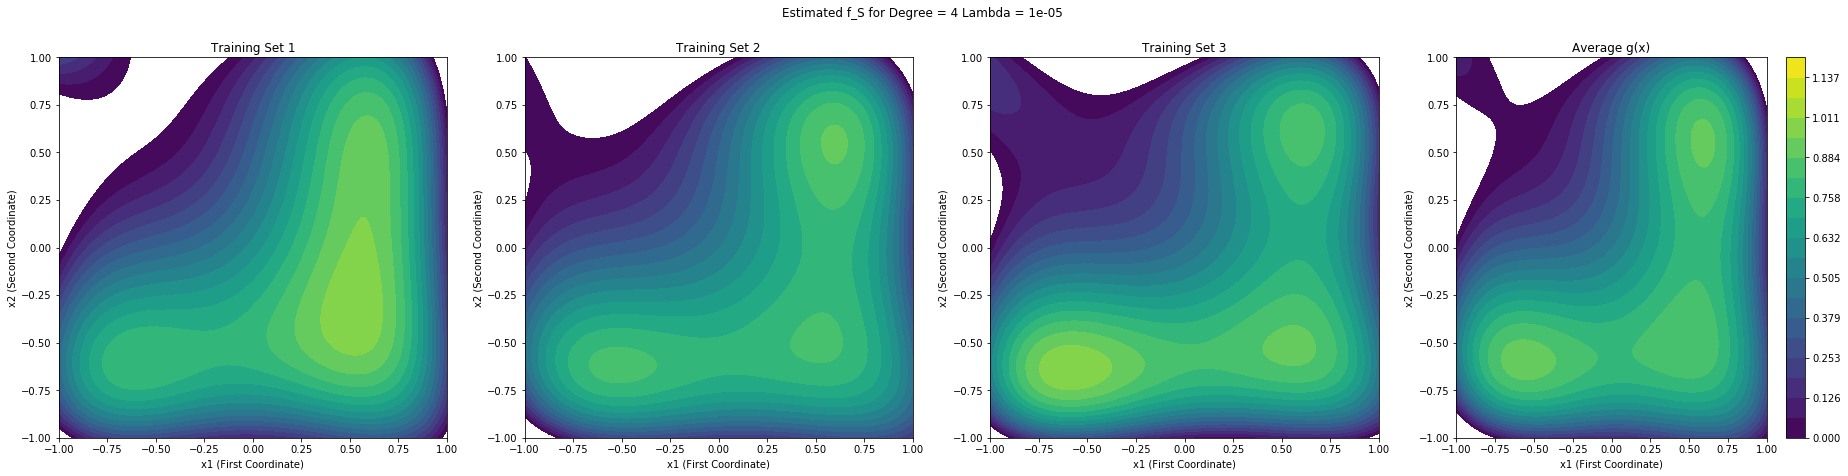

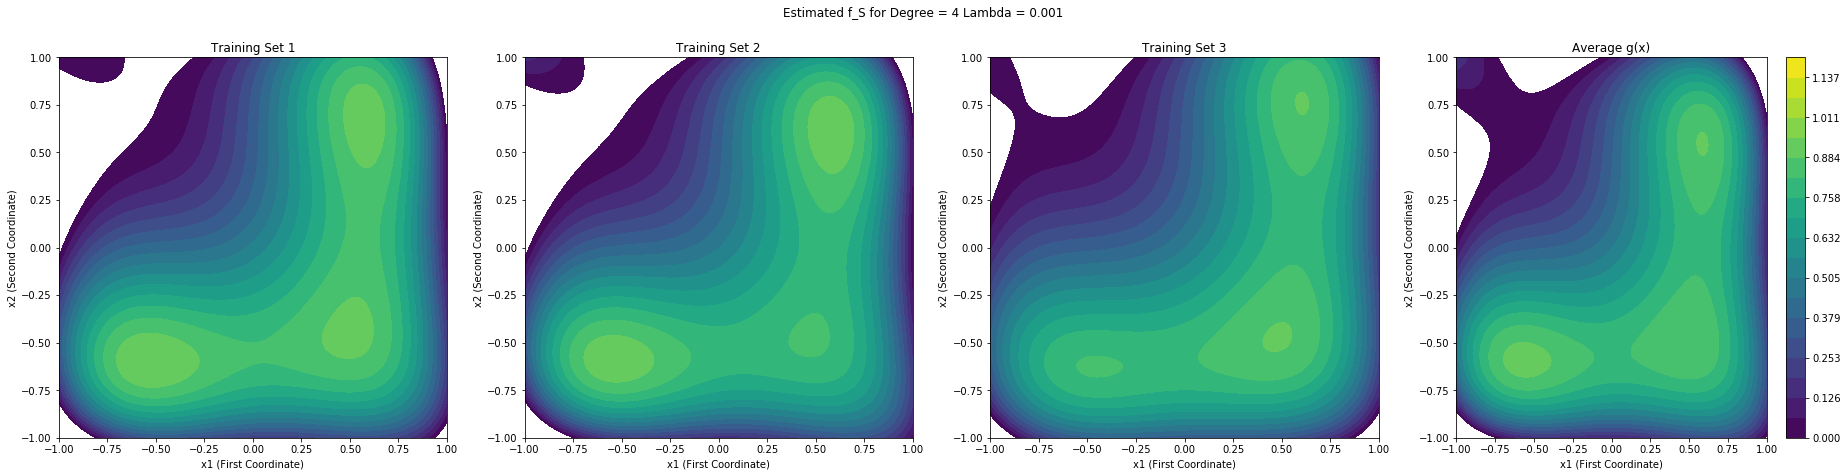

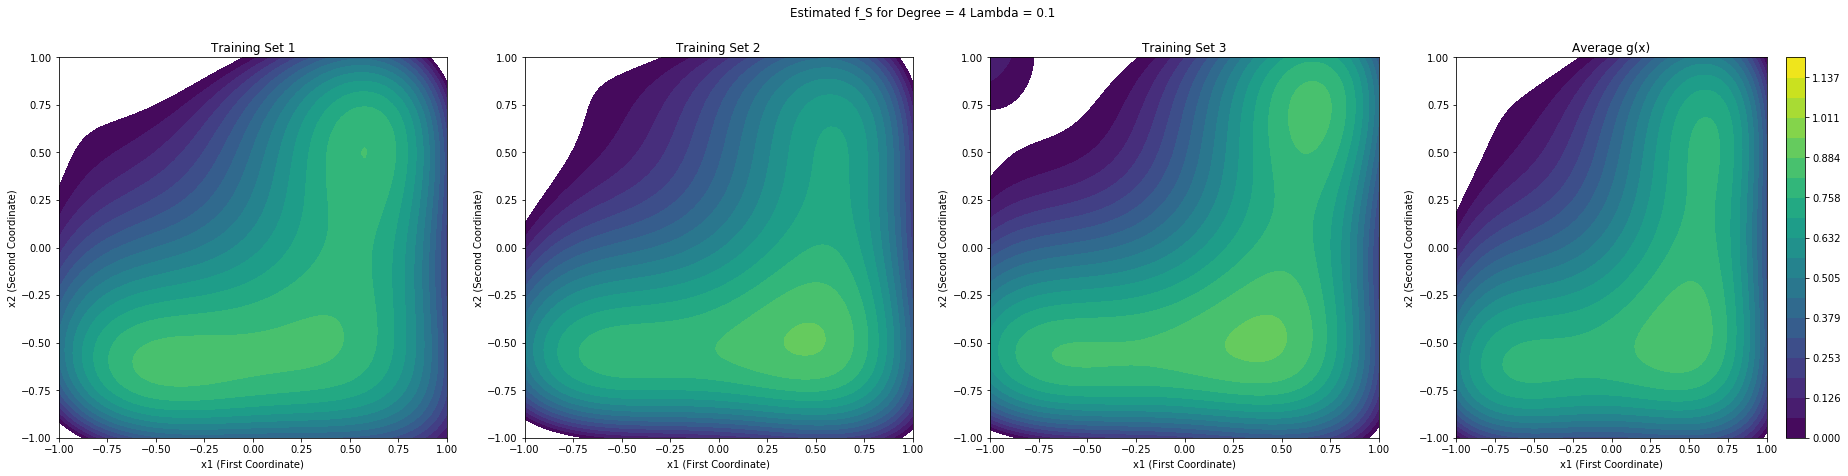

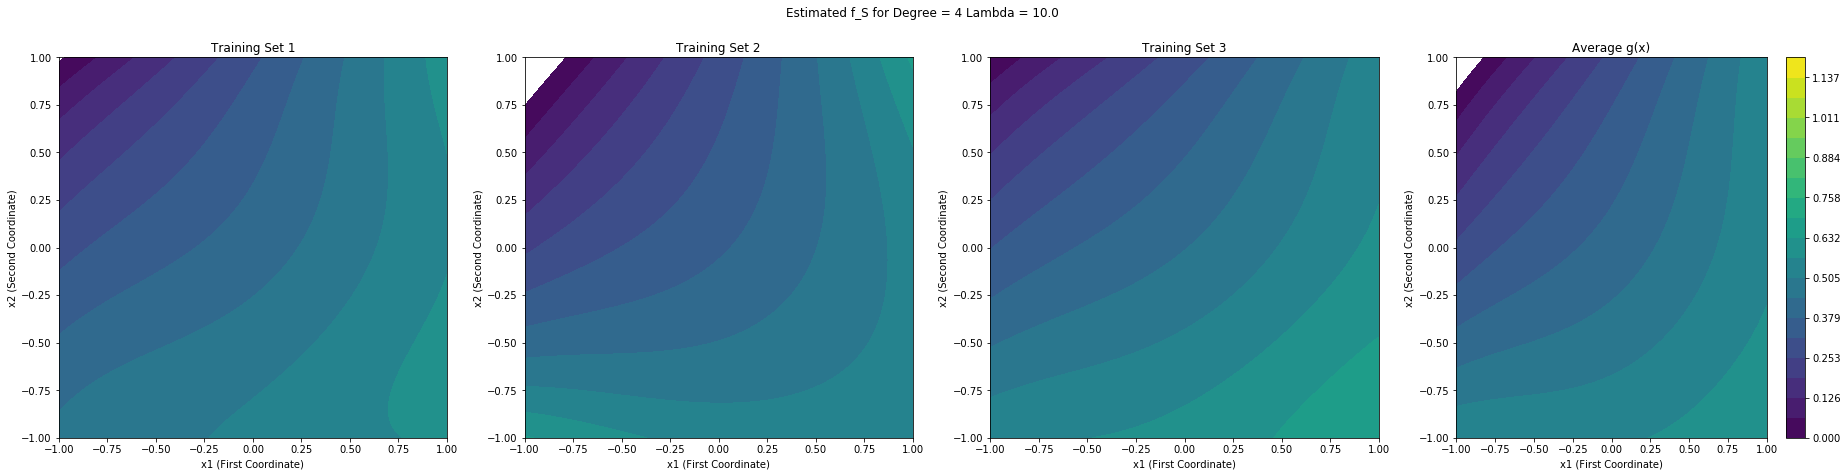

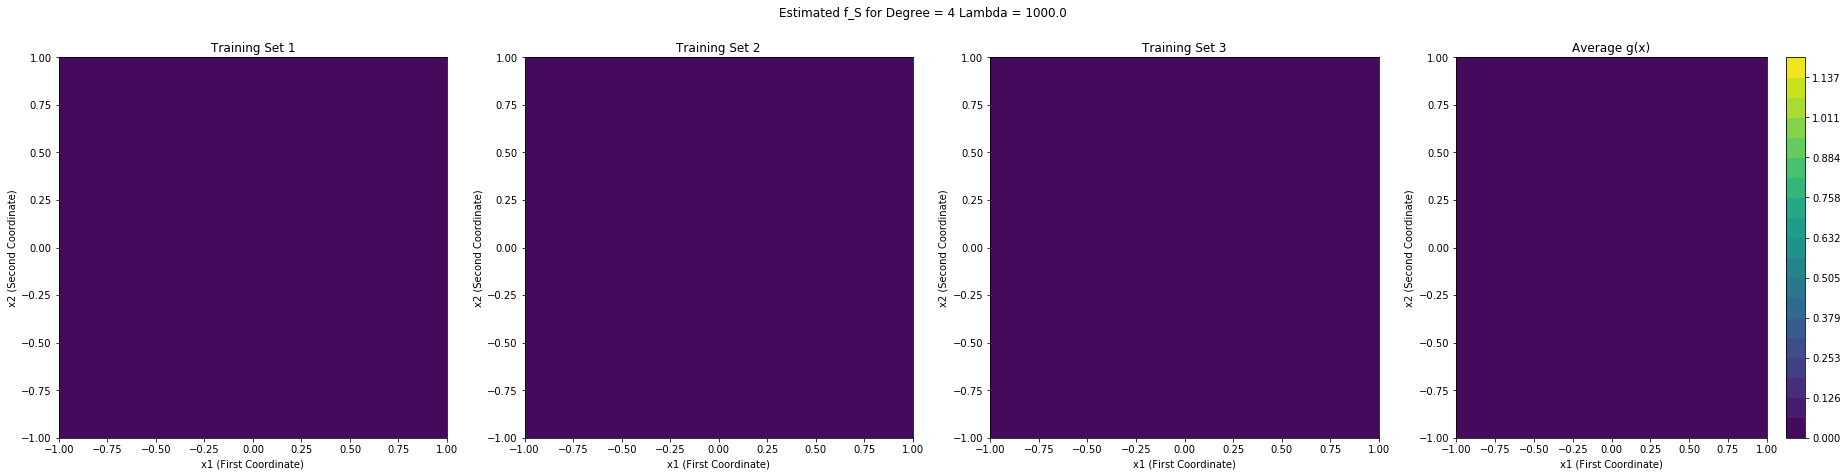

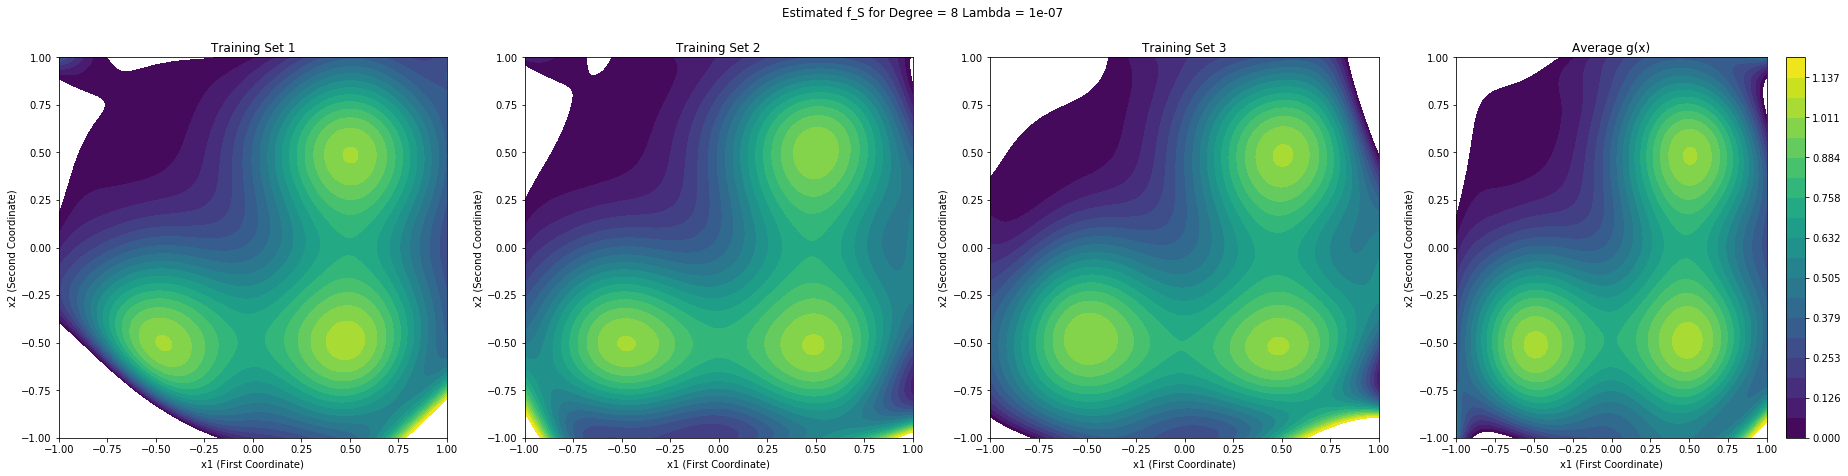

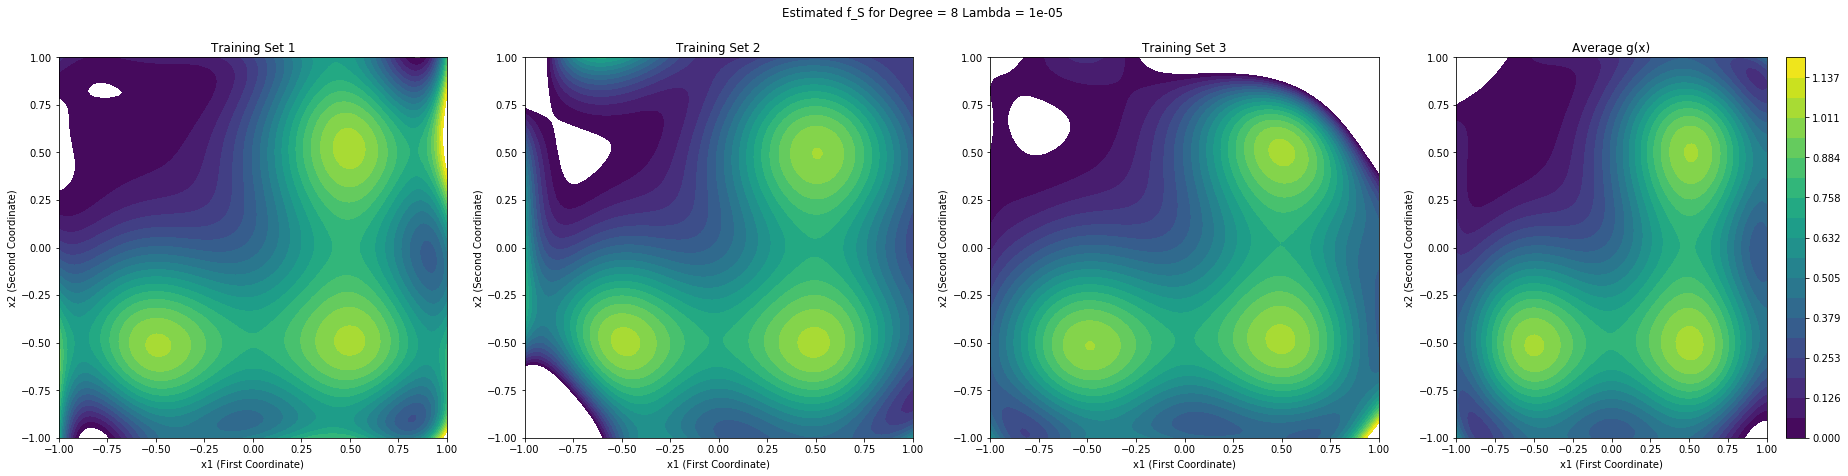

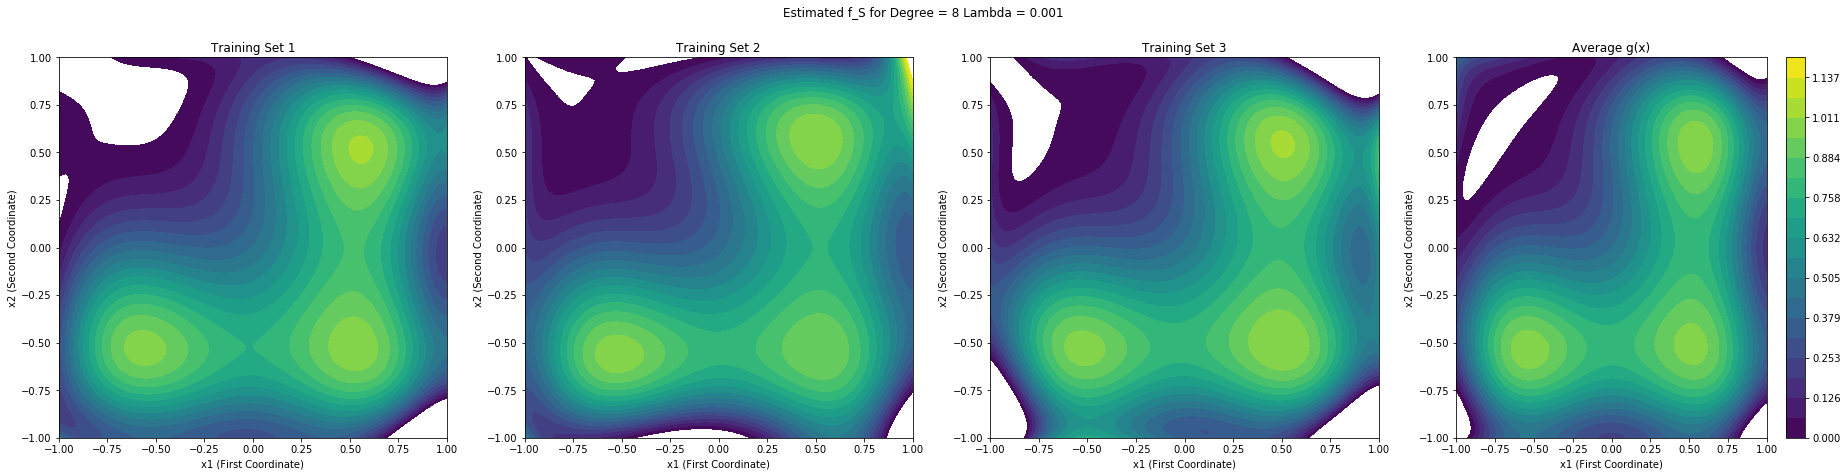

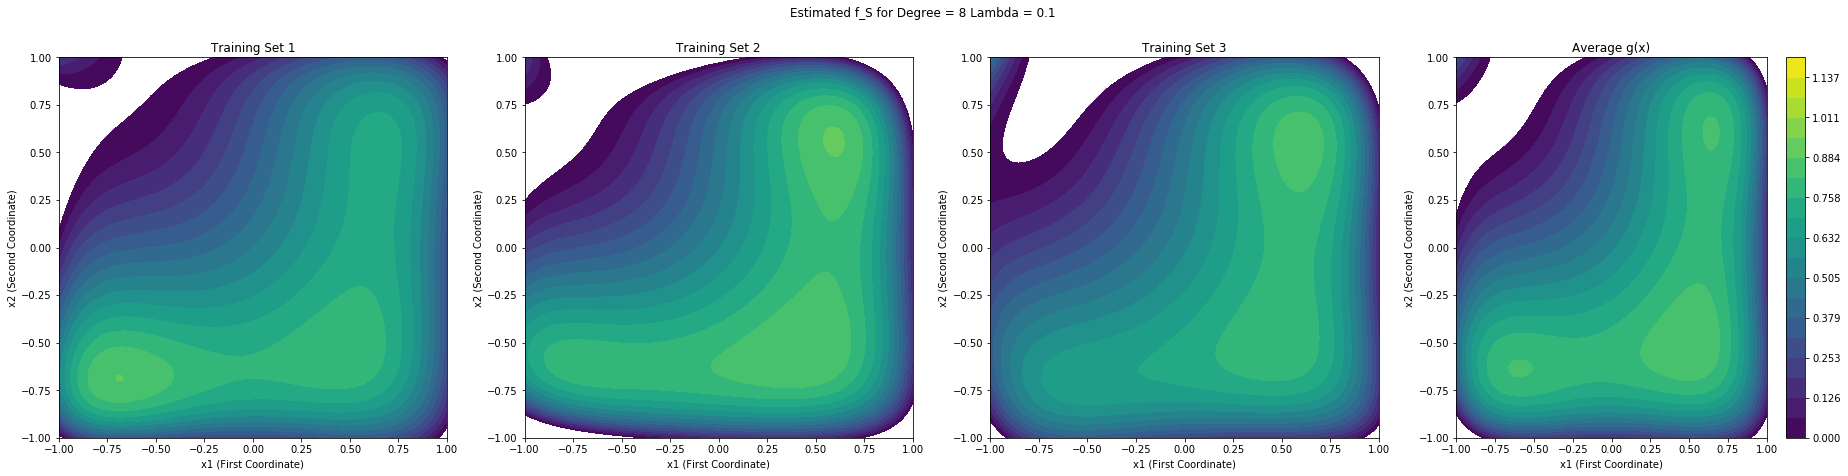

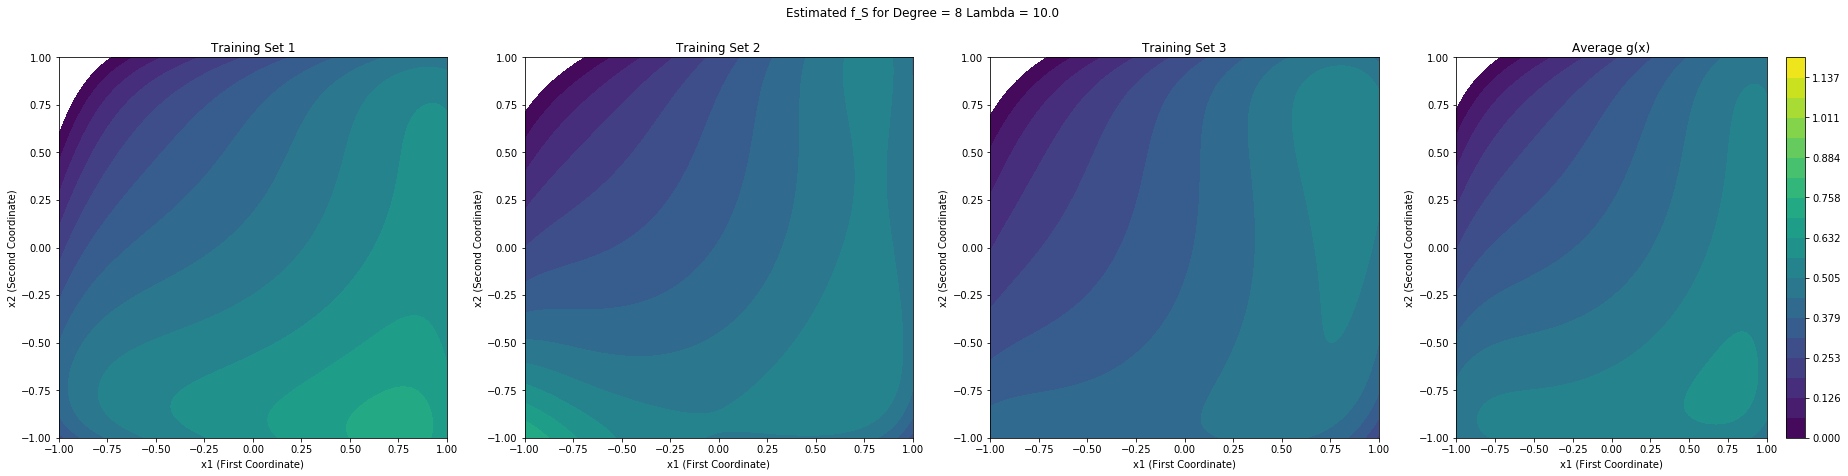

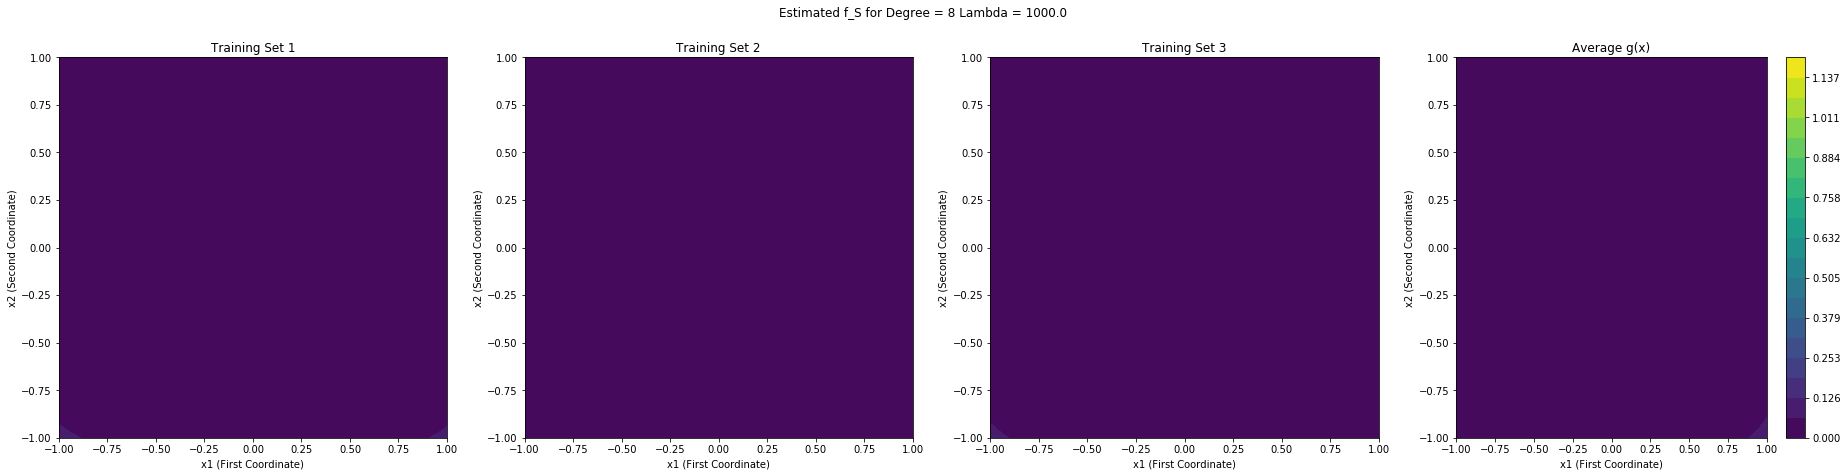

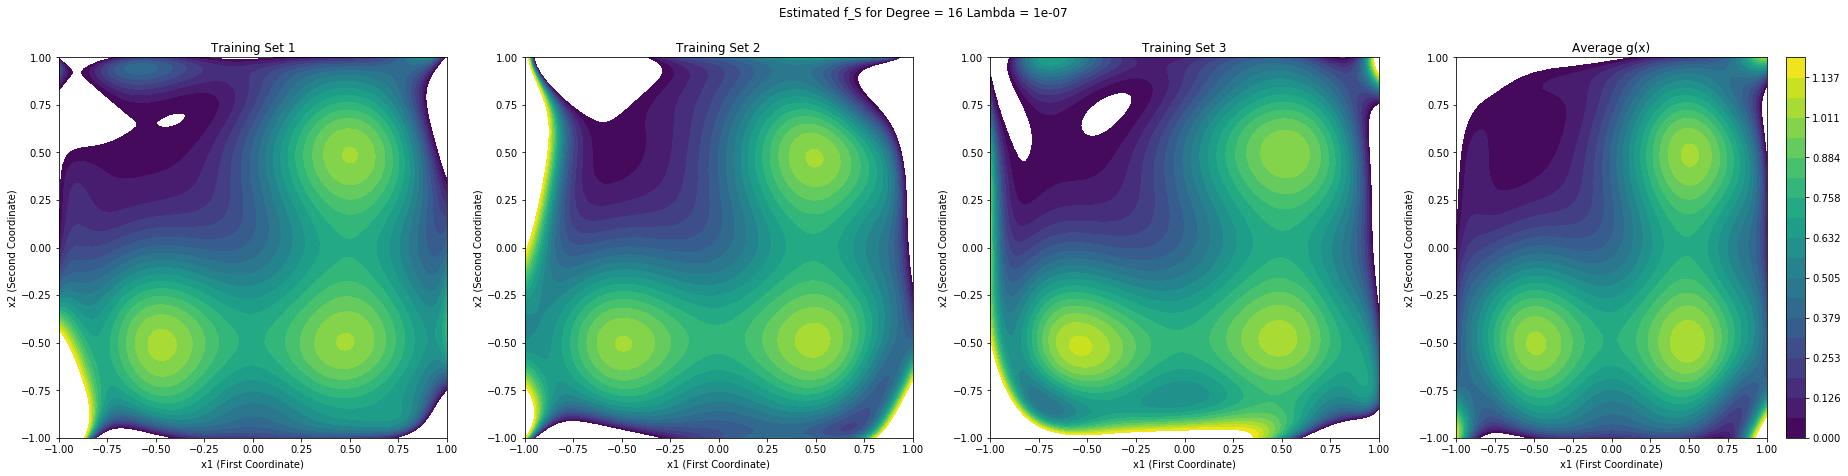

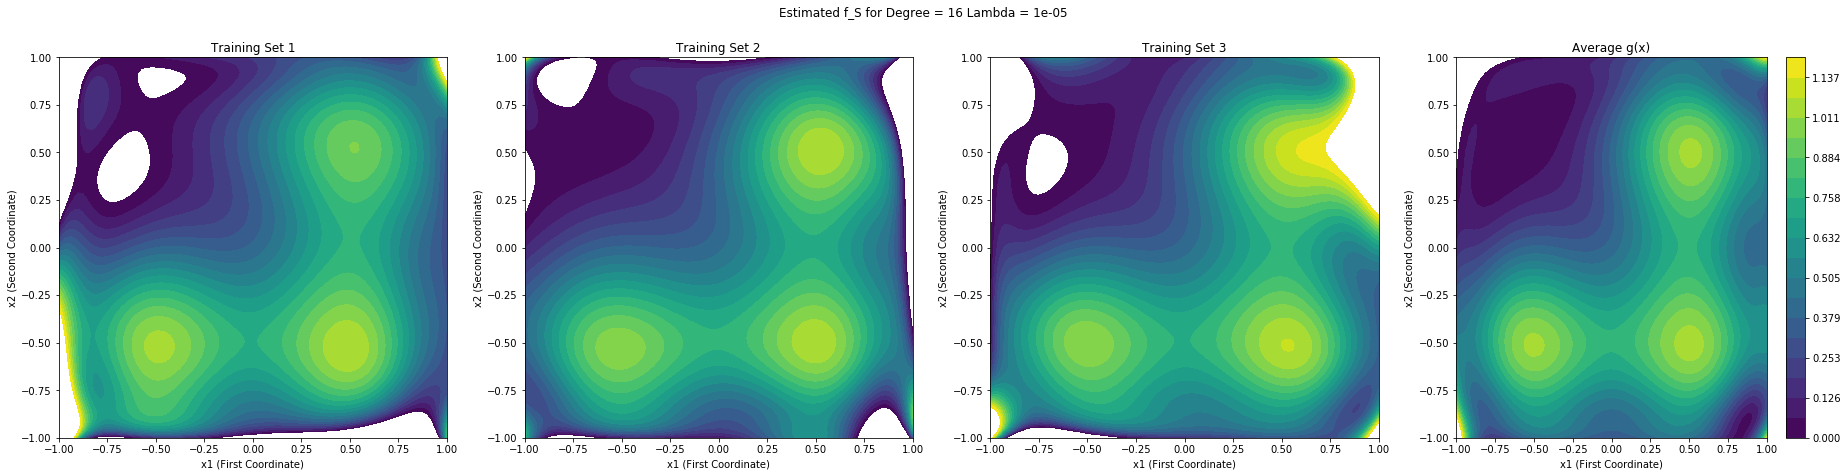

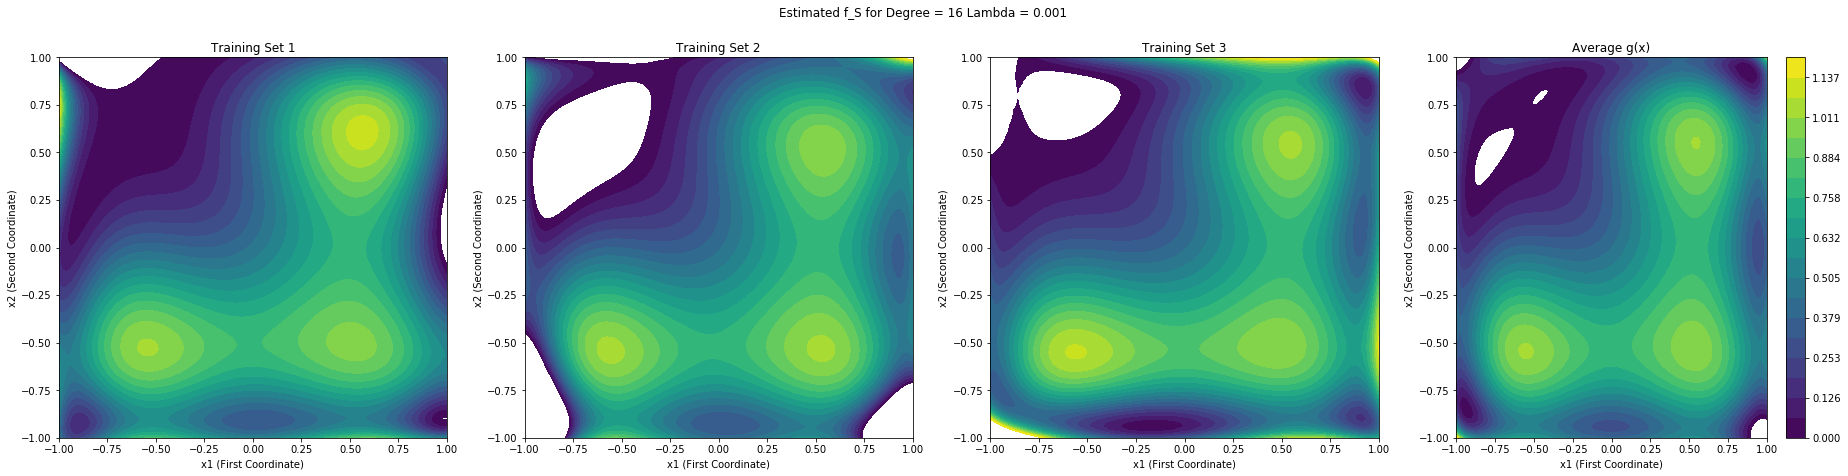

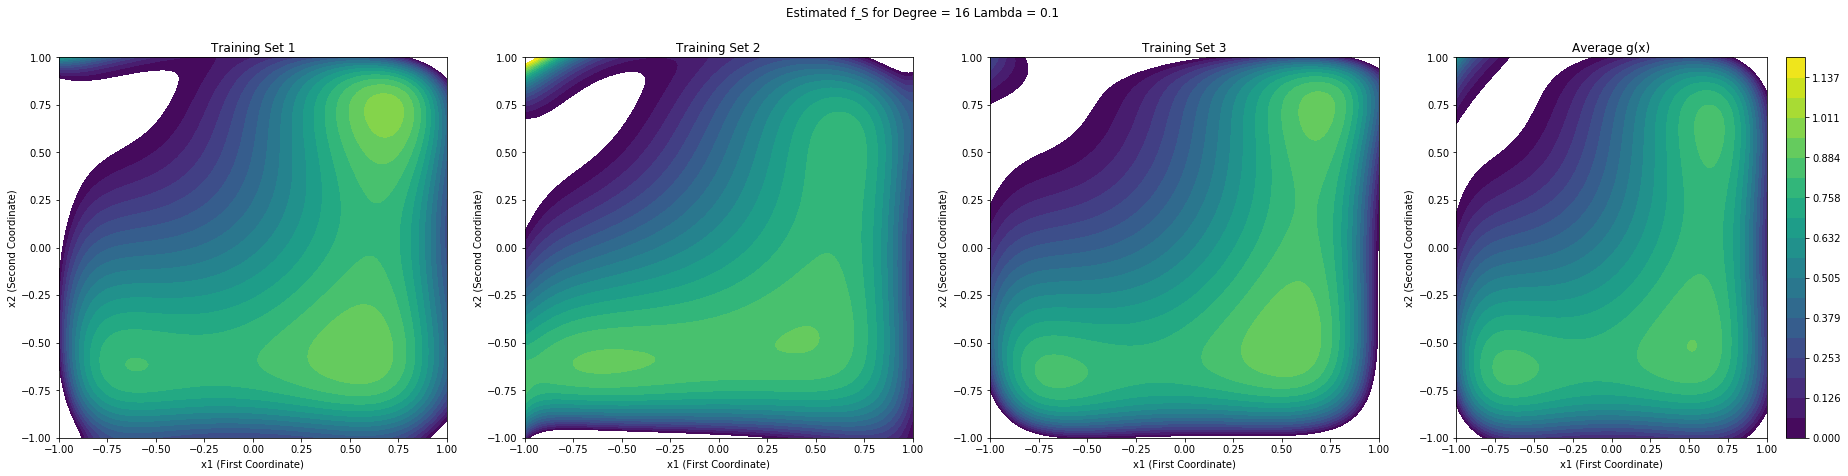

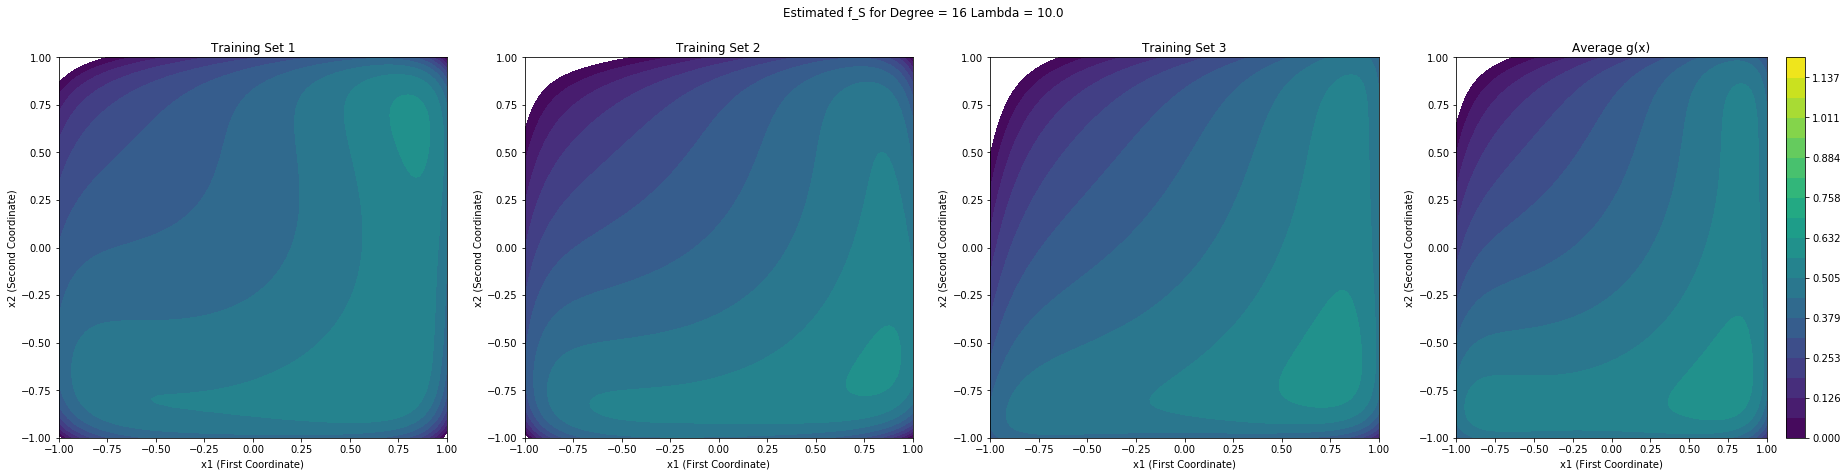

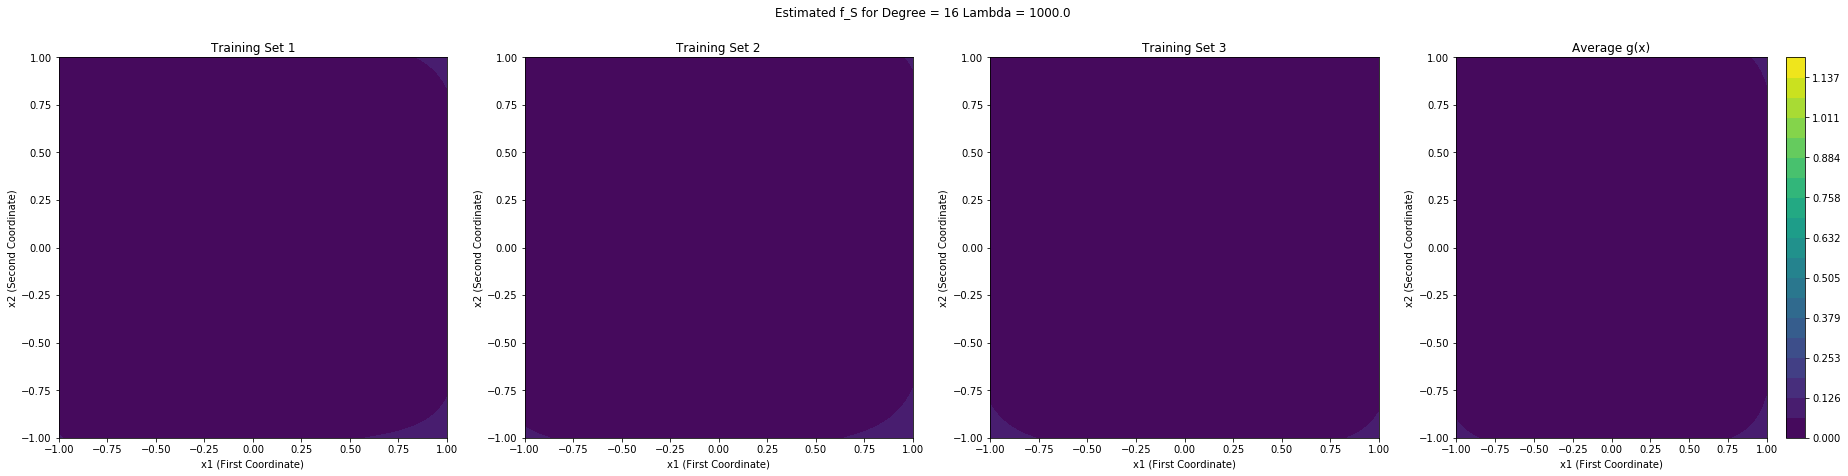

In [8]:
# Cell type : CodeWrite
def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    a = [1.]
    #print(X_test[0])
    x1 = X_test[0][0]
    x2 = X_test[0][1]
    n = X_test.shape[0]
    d = X_test.shape[1]
    for i in range(degree+1):
      for j in range(degree+1):
        if (i+j)>0 and (i+j)<=degree :
          a.append((x1**i)*(x2**j))

    fi = []
    #print(a)
    fi.append(np.array(a))
    for k in range(n):
      if k>0 :
        a = [1.]
        x1 = X_test[k][0]
        x2 = X_test[k][1]
        n = X_test.shape[0]
        d = X_test.shape[1]
        for i in range(degree+1):
          for j in range(degree+1):
            if (i+j)>0 and (i+j)<=degree:
              a.append((x1**i)*(x2**j))
        fi.append(np.array(a))
    return (np.array(fi)).dot(wt_vector)


def gety(x1,x2):
    #return (x1*x1+x2*x2)
    return (np.exp(-4 *(((x1-0.5)**2)+((x2-0.5)**2)))+np.exp(-4 *(((x1+0.5)**2)+((x2+0.5)**2)))+np.exp(-4 *(((x1-0.5)**2)+((x2+0.5)**2))))

def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X3 = []
    X2 = np.array([X.ravel()])
    Y2 = Y.ravel()
    Z1 = np.vstack((X2,Y2))
    Z1 = Z1.T
   # print(Z1)
    Z = polynomial_regression_ridge_pred(Z1, wt_vector, degree)
    Z = (Z.reshape(100,-1))
    # Get Z using other functions
    
    plt.contourf(X,Y,Z,levels=np.linspace(-1.,1. , 20))
    plt.title(title)
    plt.colorbar()
    

def visualise_polynomial_2d2(wt_vector,degree,axs,fig,title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    #print('5')
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    #print(Y)
    X3 = []
    X2 = np.array([X.ravel()])
    Y2 = Y.ravel()
    Z1 = np.vstack((X2,Y2))
    Z1 = Z1.T
   # print(Z1)
    Z = polynomial_regression_ridge_pred(Z1, wt_vector, degree)
    Z = (Z.reshape(100,-1))
    '''z = []
    for x in X:
        for y in Y:
            z2 = []
            for i in range(x.shape[0]):
                x2 = [[x[i],y[i]]]
                x2 = np.array(x2)
                p = polynomial_regression_ridge_pred(x2, wt_vector, degree)
                z2.append(p[0])
        z.append(np.array(z2))
    Z = np.array(z)'''
    #print(Z)
    # Get Z using other functions
    #print(Z.shape)
    p = axs.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    axs.set_title(title)
    #fig.colorbar(p)
    
    return p
    #axs.colorbar()
    #axs.show()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    a = [1.]
    x1 = X_train[0][0]
    x2 = X_train[0][1]
    n = X_train.shape[0]
    d = X_train.shape[1]
    for i in range(degree+1):
      for j in range(degree+1):
        if (i+j)>0 and (i+j)<=degree :
          a.append((x1**i)*(x2**j))

    fi = []
    fi.append(np.array(a))
    for k in range(n):
      if k>0 :
        a = [1.]
        x1 = X_train[k][0]
        x2 = X_train[k][1]
        n = X_train.shape[0]
        d = X_train.shape[1]
        for i in range(degree+1):
          for j in range(degree+1):
            if (i+j)>0 and (i+j)<=degree :
              a.append((x1**i)*(x2**j))
        fi.append(np.array(a))
    fi = np.array(fi)
    #print (fi.shape[1])
    n = fi.shape[0]
    d1 = fi.shape[1]
    fitransp = fi.T
    if (degree*degree<n):
        idd1 = np.identity(d1, dtype = float) 
        lamid = idd1*reg_param
        z = fitransp.dot(fi)+lamid
        z2 = np.linalg.inv(z)
        return (z2.dot(fitransp.dot(Y_train)))


    else:
        idn = np.identity(n, dtype = float) 
        lamid = idn*reg_param
        z = fi.dot(fitransp)+lamid
        z2 = np.linalg.inv(z)
        return (fitransp.dot(z2.dot(Y_train)))

    

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    fslist = []
    x1arr = np.linspace(-1.0, 1.0, num=100)
    x2arr = np.linspace(-1.0, 1.0, num=100)
    k = 0
    X1t = []
    X2t = []
    j1 = 1
    fig,axs = plt.subplots(1, 4,figsize = (32,7))
    for ax in axs.flat:
        ax.set(xlabel='x1 (First Coordinate)', ylabel='x2 (Second Coordinate)')
    for i in range(100) :
        x1_train = np.random.choice(x1arr,num_training_samples)
        x2_train = np.random.choice(x2arr,num_training_samples)
        #print(x1_train.shape)
        X1t.append(x1_train)
        X2t.append(x2_train)
    for i in range(100) :
        c = np.array(X1t[i])
        d = np.vstack((c,X2t[i]))
        d = d.T
        y = []
        for j in range(num_training_samples) :
            y.append(gety(d[j][0],d[j][1]))
        z = polynomial_regression_ridge_train(d,y,degree,reg_param)
        fslist.append(z)
        if k<3:
            fig.suptitle('Estimated f_S for Degree = '+str(degree)+' Lambda = '+str(reg_param)+'\n')
            p = visualise_polynomial_2d2(z,degree,axs[j1-1],fig,'Training Set '+str(j1))
            j1=j1+1
        k = k+1
    a = fslist[1]
    #g(x) is computed over 100 runs(avg of 100 w's), 100 different samples of 50 points each
    for i in range(100):
        if i>0:
            a = a+fslist[i]
    a = a * (0.01)
    g = a
    p = visualise_polynomial_2d2(g,degree,axs[3],fig,'Average g(x)')
    fig.colorbar(p)
    
    #bias taken over 10000 (x,y) points 
    bias = 0.0
    x = []
    y = []
    for i in range(100):
        for j in range(100):
            x.append([x1arr[i],x2arr[j]])
            y.append(gety(x1arr[i],x2arr[j]))
    x = np.array(x)
    y = np.array(y)
    p = polynomial_regression_ridge_pred(x,g,degree)
    bias = (np.linalg.norm(p-y))**2
    bias = bias/10000
    #print(bias)
    x = x[np.arange(1000)]
    p = polynomial_regression_ridge_pred(x,g,degree)
    variance = 0.0
    for i in range(100):
        x1 = []
        y1 = []
        var1 = 0
        q = polynomial_regression_ridge_pred(x,fslist[i],degree)
        var1 = (np.linalg.norm(p-q))**2
        variance = variance+(var1/1000)
    variance = variance*0.01
    #print(variance)
    '''variance = 0.0
    x1 = []
    y1 = []
    var1 = 0
    for i in range(100):
        for j in range(100):
            x = [x1arr[j],x2arr[k]]
            for k in range(100):
        
        
                
        x1 = np.array(x1)
        p = polynomial_regression_ridge_pred(x1,g,degree)
        q = polynomial_regression_ridge_pred(x1,fslist[i],degree)
        var1 = (np.linalg.norm(p-q))**2
        variance = variance+(var1/10000)
    variance = variance*0.01
    print(variance)'''
    mse = bias+variance
    return (bias,variance,mse)

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7,1e-5,1e-3,1e-1,1e1,1e3]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        plt.show()

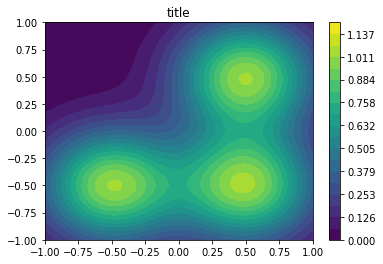

In [14]:
# Cell type: convenience
"""num_training_samples = 50
    degree = 1
    reg_param = 0.1
    x1arr = np.linspace(-1.0, 1.0, num=100)
    x2arr = np.linspace(-1.0, 1.0, num=100)
    k = 0
    X1t = []
    X2t = []
    j1 = 1
    fslist = []
    #fig,axs = plt.subplots(1, 4,figsize = (30,6))
    plt.figure(figsize = (12,8))
    #for ax in axs.flat:
      #  ax.set(xlabel='x(0) (First Coordinate)', ylabel='x(1) (Second Coordinate)')
    for i in range(100) :
        x1_train = np.random.choice(x1arr,num_training_samples)
        x2_train = np.random.choice(x2arr,num_training_samples)
        X1t.append(x1_train)
        X2t.append(x2_train)
    for i in range(100) :
        c = np.array(X1t[i])
        d = np.vstack((c,X2t[i]))
        d = d.T
        y = []
        for j in range(num_training_samples) :
            y.append(gety(d[j][0],d[j][1]))
        z = polynomial_regression_ridge_train(d,y,degree,reg_param)
        fslist.append(z)
        k = k+1
    a = fslist[1]
    #g(x) is computed over 100 runs(avg of 100 w's), 100 different samples of 50 points each
    for i in range(100):
        if i>0:
            a = a+fslist[i]
    a = a * (0.01)
    g = a
    p = visualise_polynomial_2d(g,degree,'Average g(x)')
    plt.show()"""

def getz(z):
    Z = []
    for i in z:
      Z.append(gety(i[0],i[1]))
    return np.array(Z)

X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X3 = []
X2 = np.array([X.ravel()])
Y2 = Y.ravel()
Z1 = np.vstack((X2,Y2))
Z1 = Z1.T
# print(Z1)
Z = getz(Z1)
Z = (Z.reshape(100,-1))
# Get Z using other functions
    
plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
plt.title('title')
plt.colorbar()
plt.show()

** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.
            						 
                                         BIAS MATRIX  										
|             | Lambda=10^-7         | Lambda=10^-5         | Lambda=10^-3         | Lambda=0.1           | Lambda=10            | Lambda=1000         |
|-------------|----------------------|----------------------|----------------------|----------------------|----------------------|---------------------|
| Degree = 1  | 0.05514311725573889  | 0.055102000392524414 | 0.055307679347087434 | 0.055093426390497156 | 0.06714018994837424  | 0.30725217039372277 |
| Degree = 2  | 0.03460191740318048  | 0.03475355541988938  | 0.03446496652512655  | 0.034566367546995436 | 0.062312681478754565 | 0.3037916775571059  |
| Degree = 4  | 0.00796115230307884  | 0.007671951373515799 | 0.007250707142027096 | 0.009273042911081601 | 0.05945248356966862  | 0.3027689197288336  |
| Degree = 8  | 0.014464883203794758 | 0.002855486575550038 | 0.004455584205388255 | 0.009637609475628826 | 0.05682621767783379  | 0.30182717513415114 |
| Degree = 16 | 0.021364996481593557 | 0.010525387704159598 | 0.005451700902586409 | 0.011369488493893944 | 0.053650288523338883 | 0.30130444503569026 |



			   						   VARIANCE MATRIX										

|             | Lambda=10^-7         | Lambda=10^-5         | Lambda=10^-3         | Lambda=0.1            | Lambda=10             | Lambda=1000            |
|-------------|----------------------|----------------------|----------------------|-----------------------|-----------------------|------------------------|
| Degree = 1  | 0.005065767697331264 | 0.004281636568235586 | 0.006764227370512464 | 0.0045310859241093964 | 0.001857543098938638  | 6.371579121718742e-06  |
| Degree = 2  | 0.01059252746318673  | 0.011023823154396565 | 0.008880894890608353 | 0.00977880581211648   | 0.002664254278730602  | 1.0941138334952393e-05 |
| Degree = 4  | 0.029963394220212006 | 0.02262885440513584  | 0.026644635761998367 | 0.0139269140485847    | 0.003358625752719266  | 1.3967757703920543e-05 |
| Degree = 8  | 0.9693852869450085   | 0.11790462641056426  | 0.07801169561818326  | 0.017294747703484527  | 0.0036010820425253632 | 2.2686176324202366e-05 |
| Degree = 16 | 1.5949654247412042   | 0.4429226662126948   | 0.18618959330013604  | 0.03988286672531972   | 0.0049502293506159195 | 2.1504280383052736e-05 |

             Note: These values change with different samples as the algo takes     
				   random training samples. So, different runs of above code  
		           provide different values. Above values are the avg taken over 5 
		           runs of the code. Here sample is random set of 50 points from the
		           domain. It is the training data.

    Summary:

    1. We observe that for a fixed degree, as lambda increases, the bias increases and variance decreases in most of the cases.
    2. For a fixed lambda as degree increases, the plots become too complex and f_s varies rapidly with S (variance increases). Also the expected value of f_s becomes closer to function f* (here y(x)) making bias smaller .
    3. We also see that the time complexity of the problem increases as we increase the degree.
    (Here S = training sample of 50 points, f_s is the estimated function by the algo.)

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




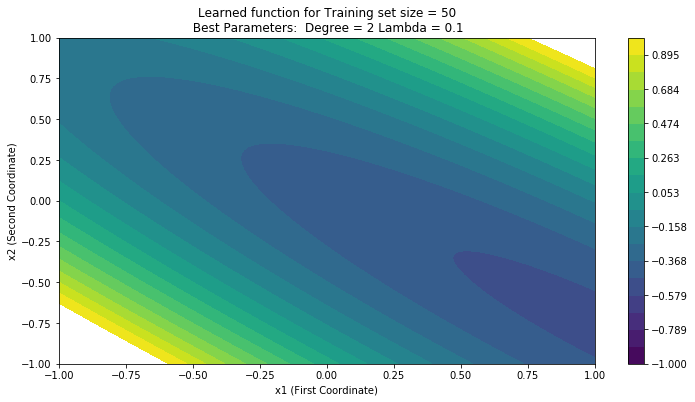

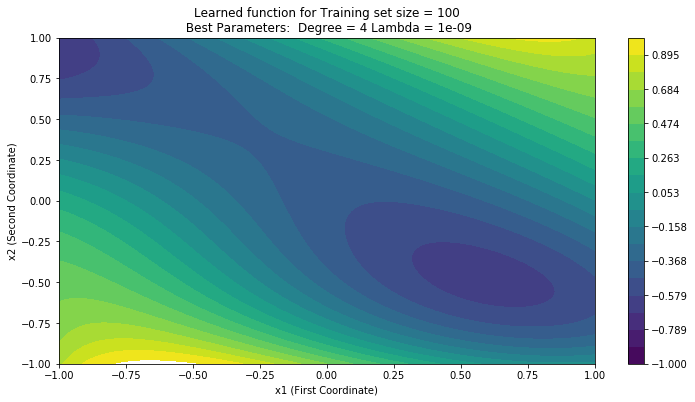

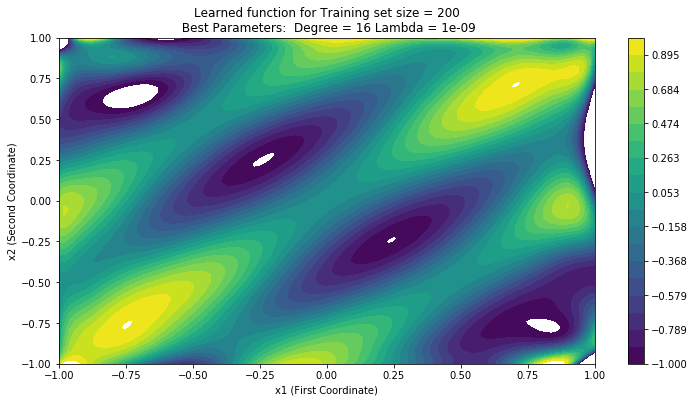

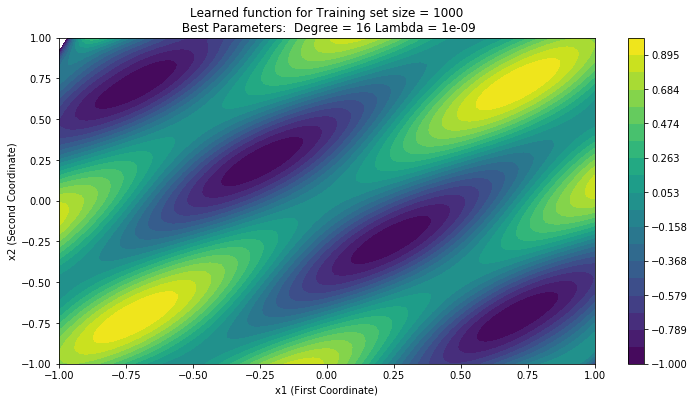

In [15]:
# Cell type : CodeWrite 
def get_data (s) :    
    data = np.load(s)

    l = []
    for x in data:
        l.append(data[x])
    return l
def print_test_sqred_error(l1):
    for i in range(5):
        f = str(2**i)+'      '
        for j in range(6):
            f = f+str(l1[i][j])+'\t'
        print(f)


def get_sample_data (s_length,l) :  
    X_train = l[0]
    Y_train = l[1]
    X_test = l[2]
    Y_test = l[3]
    l1 = []
    l1.append(X_train[np.arange(s_length)])
    l1.append(Y_train[np.arange(s_length)])
    l1.append(X_test)
    l1.append(Y_test)
    return l1
l = get_data('dataset4_1.npz')
#From the data we see that all the training and test points(X's) are from (-1,1)x(-1,1)
l2 = []
#print(get_sample_data (50,l))
l2.append(get_sample_data (50,l))
l2.append(get_sample_data (100,l))
l2.append(get_sample_data (200,l))
l2.append(get_sample_data (1000,l))

#print(l[0])
for i in range(4):
    x_train = l2[i][0]
    y_train = l2[i][1]
    x_test = l[2]
    y_test = l[3]
    #print(np.matrix(np.array(l)))
    min_degree = 16
    min_reg_param = 1e1
    min_mse = 100
    l3 = []
    for degree in [1,2,4,8,16]:
        l1 = []
        for reg_param in [1e-9,1e-7,1e-5,1e-3,1e-1,1e1]:
            #plt.figure(figsize = (12,6))
            wt_vector = polynomial_regression_ridge_train(x_train,y_train,degree,reg_param)
            #print(wt_vector)
            y_pred = polynomial_regression_ridge_pred(x_test,wt_vector,degree)
            #print('MOUNIK')
            y_diff = y_pred-y_test
            norm_diff = np.linalg.norm(y_diff)
            norm_diff = norm_diff**2
            #print('Test '+str(x_train.shape[0])+' '+str(degree)+' '+str(reg_param)+' '+str(norm_diff/x_test.shape[0]))
            y_pred2 = polynomial_regression_ridge_pred(x_train,wt_vector,degree)
            y_diff2 = y_pred2-y_train
            norm_diff2 = np.linalg.norm(y_diff2)
            norm_diff2 = norm_diff2**2
            #print('Train '+str(x_train.shape[0])+' '+str(degree)+' '+str(reg_param)+' '+str(norm_diff2/x_train.shape[0]))
            z = norm_diff/x_test.shape[0]
            l1.append(z)
            if (z)<min_mse :
                min_mse = z
                min_degree = degree 
                min_reg_param = reg_param
        l3.append(l1)        
    # print_test_sqred_error(l3)
    plt.figure(figsize = (12,6))
    wt_vector = polynomial_regression_ridge_train(x_train,y_train,min_degree,min_reg_param)
    f = 'Learned function for Training set size = '+str(x_train.shape[0])+'\n Best Parameters: '+' Degree = '+str(min_degree)+' Lambda = '+str(min_reg_param)
    visualise_polynomial_2d(wt_vector, min_degree, f)
    plt.xlabel("x1 (First Coordinate)")
    plt.ylabel("x2 (Second Coordinate)")
    plt.show()
    
    #print()
            
            

** Cell type : TextWrite **
           
           TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 50)										

|             | Lambda=10^-9       | Lambda=10^-7      | Lambda=10^-5       | Lambda=0.001       | Lambda=0.1         | Lambda=10           |
|-------------|--------------------|-------------------|--------------------|--------------------|--------------------|---------------------|
| Degree = 1  | 0.3012668176334998 | 0.301266817205659 | 0.3012667744217032 | 0.3012624963818577 | 0.300838224249188  | 0.27835069389037037 |
| Degree = 2  | 0.1578999886247717 | 0.157899987269227 | 0.1578998517170022 | 0.1578863180466387 | 0.1567352591706037 | 0.2082236412074107  |
| Degree = 4  | 0.1573339660838902 | 0.157333956015991 | 0.1573329503057680 | 0.1572427810217179 | 0.1618263881891874 | 0.19656859546515693 |
| Degree = 8  | 237.69015558983912 | 172.5018629487165 | 18.594253933794597 | 0.9902507528652459 | 0.1651557616986387 | 0.19391858752900332 |
| Degree = 16 | 250.52198923341624 | 232.0248242905624 | 66.69768434562405  | 2.337308326062836  | 0.2039614573746692 | 0.19605732165075784 |	      

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 50)										

|             | Lambda=10^-9        | Lambda=10^-7        | Lambda=10^-5         | Lambda=0.001         | Lambda=0.1          | Lambda=10           |
|-------------|---------------------|---------------------|----------------------|----------------------|---------------------|---------------------|
| Degree = 1  | 0.25038312406572716 | 0.25038312406572716 | 0.25038312406574026  | 0.2503831241962755   | 0.2503844155180829  | 0.2558978296963568  |
| Degree = 2  | 0.13411159812134155 | 0.13411159812134169 | 0.13411159812242815  | 0.1341116089798747   | 0.1342130591829448  | 0.1974826992879742  |
| Degree = 4  | 0.1020183145266075  | 0.1020183145266193  | 0.10201831464463726  | 0.10201945605437711  | 0.10410664921246368 | 0.1806379253076329  |
| Degree = 8  | 0.0001327327381806  | 0.00019915711607003 | 0.010765781158505208 | 0.04172134455599621  | 0.08199099254870248 | 0.16319970182567986 |
| Degree = 16 | 1.9565645361684e-08 | 9.367001160821e-06  | 0.00131769315440312  | 0.031113092536485216 | 0.07002070549491649 | 0.15001286027072644 |


            TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 100)										

|             | Lambda=10^-9       | Lambda=10^-7       | Lambda=10^-5       | Lambda=0.001       | Lambda=0.1         | Lambda=10           |
|-------------|--------------------|--------------------|--------------------|--------------------|--------------------|---------------------|
| Degree = 1  | 0.2731486378049521 | 0.2731486377397296 | 0.2731486312174764 | 0.2731479790203657 | 0.2730830403049822 | 0.2686215397676514  |
| Degree = 2  | 0.1532099311828065 | 0.1532099308707436 | 0.1532098996646750 | 0.1532067811876340 | 0.1529157622358392 | 0.17570947703823855 |
| Degree = 4  | 0.1427757518683784 | 0.1427757550190277 | 0.1427760700901987 | 0.1428076385194427 | 0.1460204322221530 | 0.1689801923862897  |
| Degree = 8  | 0.7129163506797102 | 0.7113196274876312 | 0.580759135593164  | 0.2036382630176928 | 0.1626275772179944 | 0.1711684367937082  |
| Degree = 16 | 54.07998831209179  | 11.7704199794187   | 23.416588856990252 | 0.4178485084001719 | 0.1883591446691374 | 0.17415996890856417 |     

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 100)										

|             | Lambda=10^-9       | Lambda=10^-7        | Lambda=10^-5        | Lambda=0.001         | Lambda=0.1        | Lambda=10           |
|-------------|--------------------|---------------------|---------------------|----------------------|-------------------|---------------------|
| Degree = 1  | 0.2580910133393135 | 0.25809101333931356 | 0.25809101333931456 | 0.25809101334983686  | 0.258091118001241 | 0.2587398750833155  |
| Degree = 2  | 0.1309506275076461 | 0.13095062750764616 | 0.13095062750780453 | 0.13095062909102842  | 0.130966087708794 | 0.16496776073260552 |
| Degree = 4  | 0.1130266378417916 | 0.11302663784179277 | 0.11302663785305082 | 0.11302674963672633  | 0.113651411583037 | 0.15237348873650713 |
| Degree = 8  | 0.0415879264155350 | 0.04158793751658175 | 0.04168003942667803 | 0.058008466397964975 | 0.092901605686984 | 0.14488569592362954 |
| Degree = 16 | 7.734505313605e-06 | 0.00048396690133777 | 0.00754402392406235 | 0.041729184710424326 | 0.083696942549312 | 0.1395438378020544  |
  


            TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 200)										

|             | Lambda=10^-9       | Lambda=10^-7        | Lambda=10^-5        | Lambda=0.001       | Lambda=0.1         | Lambda=10           |
|-------------|--------------------|---------------------|---------------------|--------------------|--------------------|---------------------|
| Degree = 1  | 0.2676630503284213 | 0.2676630503112201  | 0.26766304859110607 | 0.2676628765832214 | 0.2676457109610820 | 0.2662254689671442  |
| Degree = 2  | 0.1457806507687193 | 0.14578065073911123 | 0.14578064777834812 | 0.1457803520762770 | 0.1457544830563876 | 0.1586822288842049  |
| Degree = 4  | 0.1311709692134063 | 0.13117096853375193 | 0.13117090057246036 | 0.1311641457383034 | 0.1308305345016762 | 0.1570851154656927  |
| Degree = 8  | 0.1373629946660118 | 0.13735917852820373 | 0.13698204933221053 | 0.1181825930049873 | 0.1139653605091025 | 0.15645117748199017 |
| Degree = 16 | 0.0371502602929681 | 0.08371021744428107 | 0.17080665781340118 | 0.0869036989774787 | 0.1112140343299667 | 0.15224401261127443 |      

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 200)										

|             | Lambda=10^-9       | Lambda=10^-7         | Lambda=10^-5         | Lambda=0.001        | Lambda=0.1          | Lambda=10           |
|-------------|--------------------|----------------------|----------------------|---------------------|---------------------|---------------------|
| Degree = 1  | 0.2465350744780525 | 0.24653507447805256  | 0.24653507447805276  | 0.24653507447940218 | 0.24653508793957898 | 0.24664115434052242 |
| Degree = 2  | 0.1336653256003583 | 0.1336653256003584   | 0.1336653256003921   | 0.1336653259375662  | 0.13366866006096548 | 0.14754903759873955 |
| Degree = 4  | 0.1133381560872672 | 0.11333815608726751  | 0.11333815609035067  | 0.11333818685601951 | 0.11358989298188121 | 0.14444440429596622 |
| Degree = 8  | 0.0617373223056394 | 0.06173732238529092  | 0.061738100909698924 | 0.06394973229165392 | 0.09568723069707907 | 0.14119279224291703 |
| Degree = 16 | 2.881703399175e-05 | 0.001085431729207543 | 0.011325564334833038 | 0.04446326750322546 | 0.08349956671799355 | 0.1337625989052683  |


            TEST SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 1000)										

|             | Lambda=10^-9        | Lambda=10^-7          | Lambda=10^-5       | Lambda=0.001        | Lambda=0.1         | Lambda=10           |
|-------------|---------------------|-----------------------|--------------------|---------------------|--------------------|---------------------|
| Degree = 1  | 0.26253465030676987 | 0.2625346503067177    | 0.2625346503014934 | 0.26253464977907665 | 0.2625345976332733 | 0.2625303041565864  |
| Degree = 2  | 0.14242931863755282 | 0.14242931865008007   | 0.1424293199028028 | 0.1424294451852047  | 0.1424420744985779 | 0.14451885114122895 |
| Degree = 4  | 0.12707962836551748 | 0.12707962852222515   | 0.1270796441930427 | 0.12708121171337558 | 0.1272420949460396 | 0.14093658935220113 |
| Degree = 8  | 0.08481273587171573 | 0.08481261182174678   | 0.0848002514323811 | 0.08391323545997095 | 0.0978226920113404 | 0.13498892442359708 |
| Degree = 16 | 0.0011977860863123  | 0.0014900625529650836 | 0.0109571869472606 | 0.04965812595821563 | 0.0907374048049053 | 0.1278208960496533  |	      

            TRAINING SQUARED ERROR MATRIX(TRAINING SAMPLE SIZE = 1000)										

|             | Lambda=10^-9       | Lambda=10^-7       | Lambda=10^-5        | Lambda=0.001        | Lambda=0.1          | Lambda=10           |
|-------------|--------------------|--------------------|---------------------|---------------------|---------------------|---------------------|
| Degree = 1  | 0.2407282185181230 | 0.2407282185181231 | 0.24072821851812304 | 0.24072821851812823 | 0.24072821857035245 | 0.24072871841517662 |
| Degree = 2  | 0.1388241025424671 | 0.1388241025424671 | 0.13882410254246827 | 0.13882410255342384 | 0.13882421187545024 | 0.13971802344395548 |
| Degree = 4  | 0.1250172421712807 | 0.1250172421712807 | 0.12501724217136287 | 0.12501724299300632 | 0.12502511583632805 | 0.13417202903703976 |
| Degree = 8  | 0.0767428535436844 | 0.0767428535450417 | 0.07674286707498414 | 0.07684621641424766 | 0.09483803187328238 | 0.12843822791852466 |
| Degree = 16 | 2.548499228269e-05 | 0.0004451269216344 | 0.00653349066840625 | 0.03841533988825823 | 0.08499257629516176 | 0.12168732408409082 |

             
    Summary:

    1. Best Hyper-parameters:(Minimizing test squared error)
       For training set size =  50:	Degree =  2, Lambda = 0.1		
       For training set size = 100:	Degree =  4, Lambda = 10^-9
       For training set size = 200:	Degree = 16, Lambda = 10^-9
       For training set size =1000:	Degree = 16, Lambda = 10^-9

    2. As training set size increases, training squared error and test squared error decreases. More points enable more scope of approximating the underlying distribution of given data.
